<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Impurity-Project" data-toc-modified-id="Impurity-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Impurity Project</a></span></li><li><span><a href="#Jupyter-settings" data-toc-modified-id="Jupyter-settings-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Jupyter settings</a></span></li><li><span><a href="#helpCompounds.py" data-toc-modified-id="helpCompounds.py-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>helpCompounds.py</a></span></li><li><span><a href="#FindFunctionalGroups.py" data-toc-modified-id="FindFunctionalGroups.py-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>FindFunctionalGroups.py</a></span></li><li><span><a href="#MainFunctions.py" data-toc-modified-id="MainFunctions.py-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>MainFunctions.py</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Reaction-Mapping-(IBM-RXN-Mapper)" data-toc-modified-id="Reaction-Mapping-(IBM-RXN-Mapper)-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Reaction Mapping (IBM RXN Mapper)</a></span></li><li><span><a href="#Generating-mol-files" data-toc-modified-id="Generating-mol-files-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>Generating mol files</a></span></li><li><span><a href="#Drawing-reactions/molecules" data-toc-modified-id="Drawing-reactions/molecules-5.0.4"><span class="toc-item-num">5.0.4&nbsp;&nbsp;</span>Drawing reactions/molecules</a></span></li><li><span><a href="#Utility-Functions" data-toc-modified-id="Utility-Functions-5.0.5"><span class="toc-item-num">5.0.5&nbsp;&nbsp;</span>Utility Functions</a></span></li><li><span><a href="#Reaction-Center-Identification" data-toc-modified-id="Reaction-Center-Identification-5.0.6"><span class="toc-item-num">5.0.6&nbsp;&nbsp;</span>Reaction Center Identification</a></span></li><li><span><a href="#Screening-I" data-toc-modified-id="Screening-I-5.0.7"><span class="toc-item-num">5.0.7&nbsp;&nbsp;</span>Screening I</a></span></li><li><span><a href="#Screening-II" data-toc-modified-id="Screening-II-5.0.8"><span class="toc-item-num">5.0.8&nbsp;&nbsp;</span>Screening II</a></span></li><li><span><a href="#Template-Generation" data-toc-modified-id="Template-Generation-5.0.9"><span class="toc-item-num">5.0.9&nbsp;&nbsp;</span>Template Generation</a></span></li></ul></li></ul></li><li><span><a href="#getCandiRxns_1.py" data-toc-modified-id="getCandiRxns_1.py-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>getCandiRxns_1.py</a></span></li><li><span><a href="#DataProcessing.py" data-toc-modified-id="DataProcessing.py-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>DataProcessing.py</a></span></li><li><span><a href="#Screening.py" data-toc-modified-id="Screening.py-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Screening.py</a></span></li><li><span><a href="#PredictImpurities.py" data-toc-modified-id="PredictImpurities.py-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>PredictImpurities.py</a></span></li><li><span><a href="#Variable-summary" data-toc-modified-id="Variable-summary-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Variable summary</a></span></li><li><span><a href="#Results" data-toc-modified-id="Results-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Results</a></span></li></ul></div>

# Impurity Project

Whilst the yield of pharmaceutical/agrochemical-related intermediates and active ingredients in a reaction optimisation is often the main objective targeted, the presence of impurities at any stage of the multi-step reaction processes may affect the quality, safety, and efficacy of the final product.Therefore, an investigation into the side-products and/or degradation-related impurities of the reactions should be undertaken before conducting an automated optimisation. 

Existing forward reaction predictors such as ASKCOS and IBM RXN, whilst suitable for predicting main products, can fail for ring forming reactions, and sometimes don't suggest correct impurities. High-Throughput Screening (HTS) will yield the most accurate data, but can be time consuming. A tool that could predict impurities accurately, quickly and robustly can aid early-stage synthesis planning, route selection as well as automated optimisation. 

To this end, ongoing work is being undertaken in Cambridge CARES as part of PIPS. The main aim is to predict the impurities generated from an input chemical reaction given **reactants, reagents, reaction conditions and the main product(s)** (although this is not mandatory). 

Large chemical databases such as Reaxys contain millions of reactions (49 million as of 2019) spanning different types of chemistry, which can offer interesting insights into how functional groups can interact with each other. The methodology followed in this project relies on mining Reaxys for similar reactions (candidate reactions) to the input reaction, extracting templates from these candidate reactions encoding all possible transformations, and applying these templates to the input reaction to generate a list of possible impurities. The workflow is shown below in greater detail.


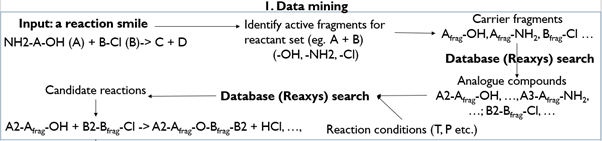


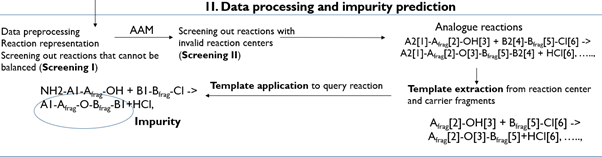


**Sections 2 to 9 include much of the source code for this project. If this is not of interest, move to Section 10 directly for results.**


Jupyter Notebook commands: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/, https://ipython.readthedocs.io/en/stable/interactive/magics.html,
https://medium.com/@lalitvyas1994/jupyter-notebooks-cool-tricks-timing-cells-making-slides-and-many-more-8bf629975c6b,
https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook,
https://towardsdatascience.com/optimizing-jupyter-notebook-tips-tricks-and-nbextensions-26d75d502663

Best practice: https://florianwilhelm.info/2018/11/working_efficiently_with_jupyter_lab/


# Jupyter settings

In [38]:
from IPython.core.interactiveshell import InteractiveShell #Allow more than one output
InteractiveShell.ast_node_interactivity = "all"
!conda info
# pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install --user


     active environment : impurityproject
    active env location : /home/aa2133/miniconda3/envs/impurityproject
            shell level : 2
       user config file : /home/aa2133/.condarc
 populated config files : 
          conda version : 4.8.5
    conda-build version : not installed
         python version : 3.8.3.final.0
       virtual packages : __glibc=2.23
       base environment : /home/aa2133/miniconda3  (writable)
           channel URLs : https://repo.anaconda.com/pkgs/main/linux-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/linux-64
                          https://repo.anaconda.com/pkgs/r/noarch
          package cache : /home/aa2133/miniconda3/pkgs
                          /home/aa2133/.conda/pkgs
       envs directories : /home/aa2133/miniconda3/envs
                          /home/aa2133/.conda/envs
               platform : linux-64
             user-agent : conda/4.8.5 requests/2.

# helpCompounds.py

helpCompounds.py contains a list of small help compounds to assist in balancing reactions from Reaxys

In [39]:
# %load ./helpCompound.py

from rdkit import Chem

# help compounds
# website to draw structure and compute SMILES:
# http://www.cheminfo.org/flavor/malaria/Utilities/SMILES_generator___checker/index.html
# or ChemDraw
hc_smilesDict = {
    'H2': '[H][H]',
    'O2': 'O=O',
    'N2': 'N#N',

    'Na+': '[Na+]',
    'K+': '[K+]',
    'NO2+': 'O=[N+]=O',
    'SO3-': 'O=S(O)[O-]',

    'CH4': 'C',
    'H2O': 'O',
    'HCl': 'Cl',
    'HBr': 'Br',
    'HI': 'I',
    'HF': 'F',
    'PH3': 'P',
    'NH3': 'N',
    'H2S': 'S',

    'H3PO3': 'O=P(O)O',
    'H2SO4': 'O=S(=O)(O)O',
    'HNO3': 'O=N(=O)O',
    'HClO3': 'O=Cl(=O)O',

    'CH3OH': 'CO',
    'CH3CH2OH': 'CCO',  # ethanol
    'CH3CH2CH2OH': 'CCCO',
    'CH3CH2CH2CH2OH': 'CCCCO',

    'CH3COOH': 'CC(=O)O',
    'CH3CH2COOH': 'CCC(=O)O',
    'CH3CH2CH2COOH': 'CCCC(=O)O',

    'CH3OCH2COOH': 'COCC(=O)O',

    'C6H6': 'c1ccccc1',  # benzene
    'C6H5CH3': 'Cc1ccccc1',  # toluene
    'C6H5OH': 'Oc1ccccc1',  # phenol
    'C6H5Cl': 'Clc1ccccc1'
}

hc_molDict = {hc: Chem.AddHs(Chem.MolFromSmiles(
    hc_smilesDict[hc])) for hc in hc_smilesDict}

In [40]:
hc_molDict

{'H2': <rdkit.Chem.rdchem.Mol at 0x7f15c4d16300>,
 'O2': <rdkit.Chem.rdchem.Mol at 0x7f15c4d16350>,
 'N2': <rdkit.Chem.rdchem.Mol at 0x7f15c4d163a0>,
 'Na+': <rdkit.Chem.rdchem.Mol at 0x7f15c4d163f0>,
 'K+': <rdkit.Chem.rdchem.Mol at 0x7f15c4d16440>,
 'NO2+': <rdkit.Chem.rdchem.Mol at 0x7f15c4d16490>,
 'SO3-': <rdkit.Chem.rdchem.Mol at 0x7f15c4d164e0>,
 'CH4': <rdkit.Chem.rdchem.Mol at 0x7f15c4d16530>,
 'H2O': <rdkit.Chem.rdchem.Mol at 0x7f15c4d16580>,
 'HCl': <rdkit.Chem.rdchem.Mol at 0x7f15c4d165d0>,
 'HBr': <rdkit.Chem.rdchem.Mol at 0x7f15c4d16620>,
 'HI': <rdkit.Chem.rdchem.Mol at 0x7f15c4d16670>,
 'HF': <rdkit.Chem.rdchem.Mol at 0x7f15c4d16710>,
 'PH3': <rdkit.Chem.rdchem.Mol at 0x7f15c4d16760>,
 'NH3': <rdkit.Chem.rdchem.Mol at 0x7f15c4d167b0>,
 'H2S': <rdkit.Chem.rdchem.Mol at 0x7f15c4d16800>,
 'H3PO3': <rdkit.Chem.rdchem.Mol at 0x7f15c4d16850>,
 'H2SO4': <rdkit.Chem.rdchem.Mol at 0x7f15c4d168a0>,
 'HNO3': <rdkit.Chem.rdchem.Mol at 0x7f15c4d168f0>,
 'HClO3': <rdkit.Chem.rdchem.M

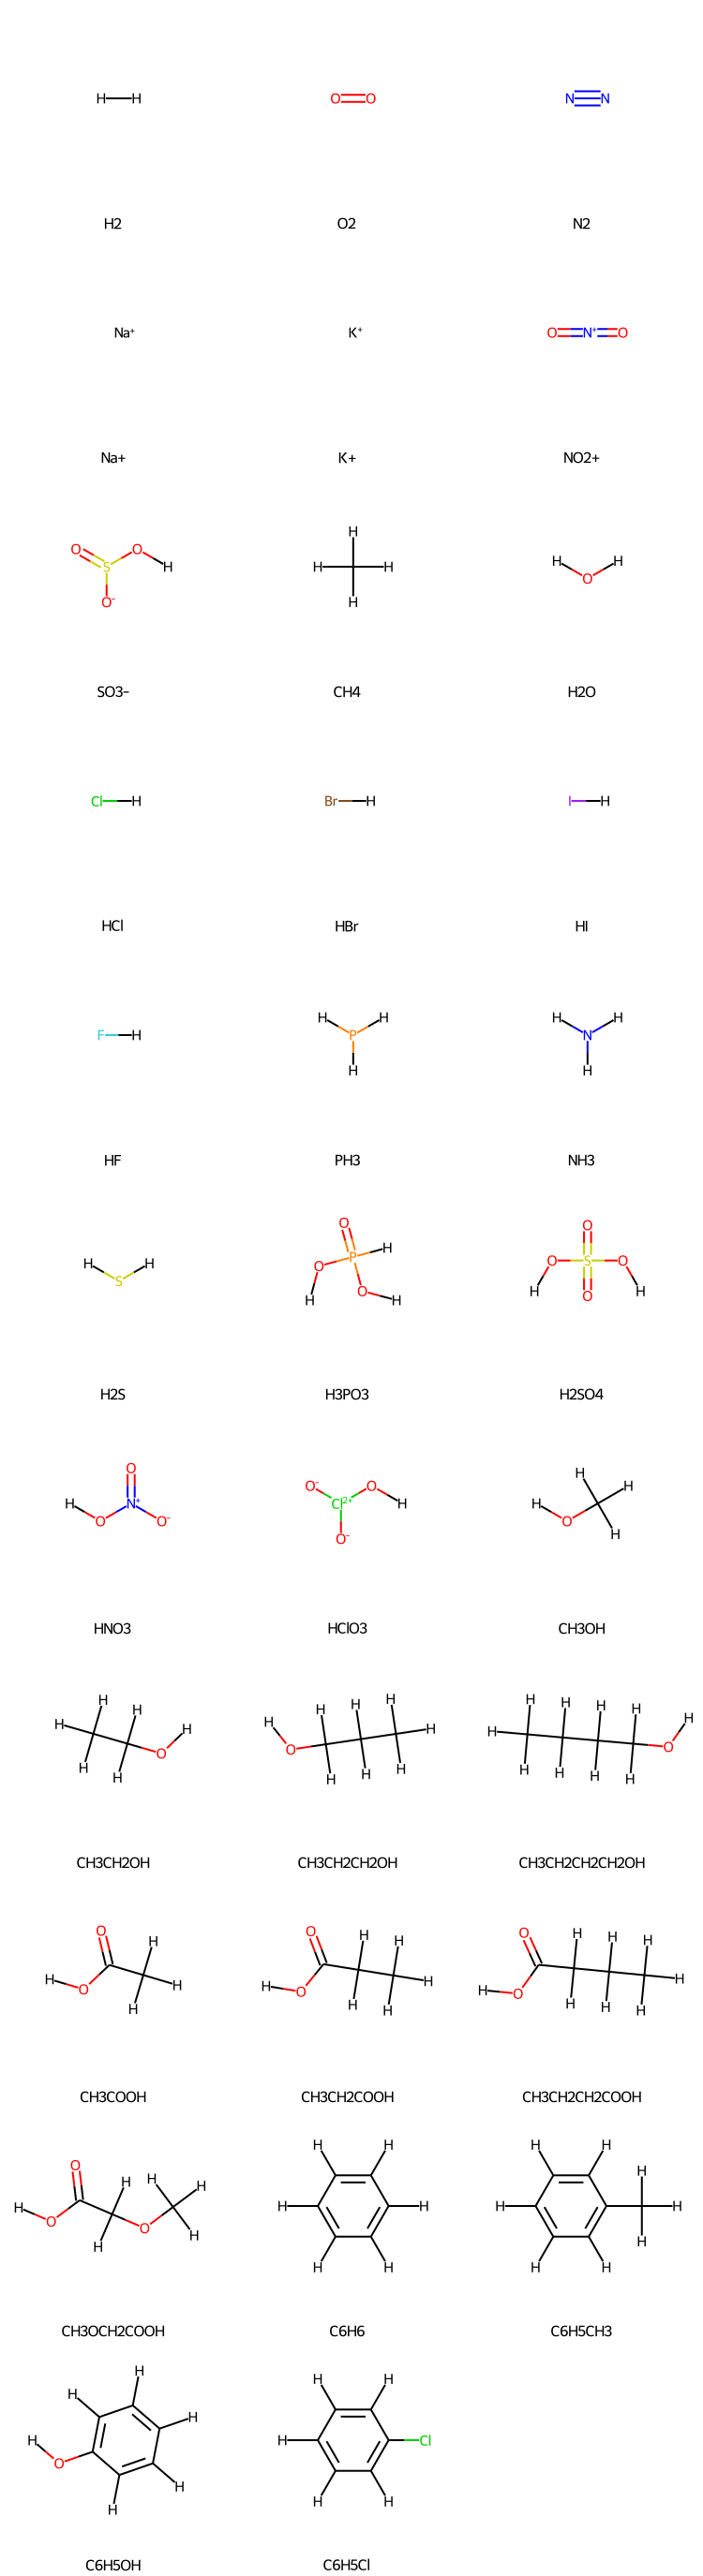

In [41]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

Draw.MolsToGridImage(hc_molDict.values(), legends=list(hc_molDict.keys()), subImgSize=(250, 250), useSVG=False)

# FindFunctionalGroups.py

This file contains `identify_functional_groups(mol)`, a function that identifies functional groups in molecules

In [42]:
%%capture

# %load ./FindFunctionalGroups.py
"""
Created on Fri Oct  2 14:35:18 2020

@author: AADA01
"""

#
#  Original authors: Richard Hall and Guillaume Godin
#  This file is part of the RDKit.
#  The contents are covered by the terms of the BSD license
#  which is included in the file license.txt, found at the root
#  of the RDKit source tree.

#
#
# Richard hall 2017
# IFG main code
# Guillaume Godin 2017
# refine output function
# astex_ifg: identify functional groups a la Ertl, J. Cheminform (2017) 9:36

from rdkit import Chem
from collections import namedtuple

def merge(mol, marked, aset):
    bset = set()
    for idx in aset:
        atom = mol.GetAtomWithIdx(idx)
        for nbr in atom.GetNeighbors():
            jdx = nbr.GetIdx()
            if jdx in marked:
                marked.remove(jdx)
                bset.add(jdx)
    if not bset:
        return
    merge(mol, marked, bset)
    aset.update(bset)

# atoms connected by non-aromatic double or triple bond to any heteroatom
# c=O should not match (see fig1, box 15).  I think using A instead of * should sort that out?
PATT_DOUBLE_TRIPLE = Chem.MolFromSmarts('A=,#[!#6]')
# atoms in non aromatic carbon-carbon double or triple bonds
PATT_CC_DOUBLE_TRIPLE = Chem.MolFromSmarts('C=,#C')
# acetal carbons, i.e. sp3 carbons connected to tow or more oxygens, nitrogens or sulfurs; these O, N or S atoms must have only single bonds
PATT_ACETAL = Chem.MolFromSmarts('[CX4](-[O,N,S])-[O,N,S]')
# all atoms in oxirane, aziridine and thiirane rings
PATT_OXIRANE_ETC = Chem.MolFromSmarts('[O,N,S]1CC1')

PATT_TUPLE = (PATT_DOUBLE_TRIPLE, PATT_CC_DOUBLE_TRIPLE, PATT_ACETAL, PATT_OXIRANE_ETC)

def identify_functional_groups(mol):
    marked = set()
#mark all heteroatoms in a molecule, including halogens
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() not in (6,1): # would we ever have hydrogen?
            marked.add(atom.GetIdx())

#mark the four specific types of carbon atom
    for patt in PATT_TUPLE:
        for path in mol.GetSubstructMatches(patt):
            for atomindex in path:
                marked.add(atomindex)

#merge all connected marked atoms to a single FG
    groups = []
    while marked:
        grp = set([marked.pop()])
        merge(mol, marked, grp)
        groups.append(grp)

#extract also connected unmarked carbon atoms
    ifg = namedtuple('IFG', ['atomIds', 'atoms', 'type'])
    ifgs = []
    for g in groups:
        uca = set()
        for atomidx in g:
            for n in mol.GetAtomWithIdx(atomidx).GetNeighbors():
                if n.GetAtomicNum() == 6:
                    uca.add(n.GetIdx())
        ifgs.append(ifg(atomIds=tuple(list(g)), atoms=Chem.MolFragmentToSmiles(mol, g, canonical=True), type=Chem.MolFragmentToSmiles(mol, g.union(uca),canonical=True)))
    return ifgs

def main():
    for ix, smiles in enumerate([
        'Cc1nc(NS(=O)(=O)c2ccc(N)cc2)nc(C)c1', # fig1, 1
        'NC(=N)c1ccc(C=Cc2ccc(cc2O)C(=N)N)cc1', # 2
        'CC(=O)Nc1nnc(s1)S(=O)(=O)N', # 3
        'NS(=O)(=O)c1cc2c(NCNS2(=O)=O)cc1Cl', # 4
        'CNC1=Nc2ccc(Cl)cc2C(=N(=O)C1)c3ccccc3', # 5
        'Cc1onc(c1C(=O)NC2C3SC(C)(C)C(N3C2=O)C(=O)O)c4ccccc4', # 6
        'Clc1ccccc1C2=NCC(=O)Nc3ccc(cc23)N(=O)=O', # 7
        'COc1cc(cc(C(=O)NCC2CCCN2CC=C)c1OC)S(=O)(=O)N', # 8
        'Cc1ccc(Cl)c(Nc2ccccc2C(=O)O)c1Cl', # 9
        'Clc1ccc2Oc3ccccc3N=C(N4CCNCC4)c2c1', # 10 - there is a discrepancy with the paper here!  I wonder if Peter has the ring as aromatic?
        'FC(F)(F)CN1C(=O)CN=C(c2ccccc2)c3cc(Cl)ccc13', # 11
        'OCC1OC(CC1O)n2cnc3C(O)CNC=Nc32', # 12
        'CCNC1CC(C)S(=O)(=O)c2sc(cc12)S(=O)(=O)N', # 13
        'CC(O)C1C2C(C)C(=C(N2C1=O)C(=O)O)SC3CNC(C3)C(=O)N(C)C', # 14
        'CC1CN(CC(C)N1)c2c(F)c(N)c3c(=O)c(cn(C4CC4)c3c2F)C(=O)O', # 15
        'CC(=CCC1C(=O)N(N(C1=O)c2ccccc2)c3ccccc3)C', # 16
        'Clc1ccc2N=C3NC(=O)CN3Cc2c1Cl', # 17
        'CC(=O)NC1C(NC(=N)N)C=C(OC1C(O)C(O)CO)C(=O)O', # 18
        'CC(O)C(O)C1CNc2nc(N)nc(O)c2N1', # 19
        'NC1CCCCN(C1)c2c(Cl)cc3c(=O)c(cn(C4CC4)c3c2Cl)C(=O)O', # 20
    ]):
        m = Chem.MolFromSmiles(smiles)
        fgs = identify_functional_groups(m)
        print('%2d: %d fgs'%(ix+1, len(fgs)), fgs)


if __name__ == "__main__":
    main()

# MainFunctions.py

This file contains all relevant functions for impurity prediction and visualisation

### Dependencies

In [43]:
# %load ./MainFunctions.py
"""
Created on Mon Sep 21 17:50:19 2020
This file contains all relevant functions for impurity prediction and visualisation (Instructions for installation are provided under
setup steps)
@author: AADA01
"""

# %matplotlib inline
from rdkit import Chem #Importing RDKit
from rdkit.Chem import AllChem #Overall support
from rdkit.Chem import FunctionalGroups
from rdkit.Chem import PeriodicTable, GetPeriodicTable
import cirpy
from rdkit.Chem import RDConfig
from rdkit.Chem import Draw #For drawing molecules/reactions
from rdkit.Chem import rdChemReactions #Reaction processing
from rdkit.Chem.Draw import rdMolDraw2D #Drawing 2D molecules/reactions
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display, Image
from IPython.display import SVG  #For SVG support
from PIL import Image #Working with images
import matplotlib.pyplot as plt
import io
import os #Working with the OS
from rxnmapper import RXNMapper #Importing RXNMapper for unsupervised atom mapping
from ttictoc import tic,toc
from rdkit.Chem import BRICS #For fragmenting
from chempy import balance_stoichiometry
import json
try:
    import pickle5 as pickle #Only if pickle doesn't work
except Exception:
    import pickle
import cairosvg
import copy, itertools,shutil
from collections import Counter
from helpCompound import hc_smilesDict, hc_molDict
from FindFunctionalGroups import identify_functional_groups as IFG

'\nCreated on Mon Sep 21 17:50:19 2020\nThis file contains all relevant functions for impurity prediction and visualisation (Instructions for installation are provided under\nsetup steps)\n@author: AADA01\n'

### Reaction Mapping (IBM RXN Mapper)

In [44]:
#%% Reaction Mapping

def maprxn(rxns):
    """
    For a given list of reactions, rxns, returns mapped reactions with confidence scores.
    Uses IBM transformer model.

    Parameters
    ----------
    rxns : list
       List of reaction SMILES (no reactant/reagent split)

    Returns
    -------
    Mapped reactions with confidence scores: list
        mapped_rxn
             Mapped reaction SMARTS
        confidence
            Model confidence in the mapping rxn

    """

    rxn_mapper=RXNMapper()
    return rxn_mapper.get_attention_guided_atom_maps(rxns)

### Generating mol files

In [45]:
#%% Generating mol files

def molfromsmiles(SMILES):
    '''
    Converts a smiles string into a mol object for RDKit use. Also graphically
    represents molecule using matplotlib.

    Parameters
    ----------
    SMILES : String
        Smiles string of molecule

    Returns
    -------
    mol object for RDKit use
    figure of molecule

    '''

    mol=Chem.MolFromSmiles(SMILES)


    return mol

### Drawing reactions/molecules

In [46]:
#%% Drawing reactions/mols


def mol_with_atom_index(mol):
    '''
    Draw a molecule with atom index numbers (set by RDKit)

    Parameters
    ----------
    mol : RDKit mole
        RDKit mole plain

    Returns
    -------
    mol : RDkit mol
        RDKit mol with atom indices

    '''
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol


def moveAtomMapsToNotes(m):
    '''
    Make note of the atom mapping

    Parameters
    ----------
    m : mole structure
        RDKit mole structure

    Returns
    -------
    None.

    '''
    for at in m.GetAtoms():
        if at.GetAtomMapNum():
            at.SetProp("atomNote",str(at.GetAtomMapNum()))
            #at.SetAtomMapNum(0)

def drawReaction(rxn):
    '''
    Produces an SVG of a mapped reaction

    Parameters
    ----------
    rxn : String
       Reaction SMARTS string

    Returns
    -------
    SVG image

    '''
    trxn = rdChemReactions.ChemicalReaction(rxn)
    for m in trxn.GetReactants():
        moveAtomMapsToNotes(m)
    for m in trxn.GetProducts():
        moveAtomMapsToNotes(m)
    # if filetype=='svg':
#     d2d = rdMolDraw2D.MolDraw2DSVG(4000,500)
    d2d=rdMolDraw2D.MolDraw2DSVG(1000,500)
    # else:
    #     d2d=rdMolDraw2D.MolDraw2DCairo(4000,500)

    d2d.DrawReaction(trxn,highlightByReactant=True)
    d2d.FinishDrawing()
    img=d2d.GetDrawingText()

    # if filetype=='svg':

    return SVG(img)
    # else:
    #     im=Image.open(io.BytesIO(img))
    #     return im
        # d2d.WriteDrawingText('text.png') #Only works with cairo, plus atom notes not included

def drawMol(m,filetype):
    '''
    Parameters
    ----------
    m : mol file
        molecule file

    Returns
    -------
    SVG image

    '''
    if filetype=='svg':
        d=rdMolDraw2D.MolDraw2DSVG(400,300)
    else:
        d=rdMolDraw2D.MolDraw2DCairo(400,300)

    Draw.PrepareAndDrawMolecule(d,m)
    d.FinishDrawing()
    img=d.GetDrawingText()

    if filetype=='svg':
        return SVG(img)
    else:
        im=Image.open(io.BytesIO(img))
        return im

# Tkinter window
# Draw.ShowMol(p3)

#Save image to file
# fig=Draw.MolToFile(p4,'example.png',size=(500,500))

#Plotting in plot pane (matlab canvas)
# AllChem.Compute2DCoords(mol)
# fig=Draw.MolToMPL(mol)

#Rxn image (quite small)
# fig=Draw.ReactionToImage(rxn,subImgSize=(1000,1000))

### Utility Functions

In [47]:
#%% Utility Functions

def openpickle(filename):
    '''
    Takes a pickled file and loads it

    Parameters
    ----------
    filename : String
        File path of .pickle file

    Returns
    -------
    loadfile : Python object
        

    '''
    infile=open(filename,'rb')
    infile.seek(0)
    loadfile=pickle.load(infile)
    infile.close()
    return loadfile
    # with open('filename', 'rb') as handle: #Faster way
    # return pickle.load(handle)

def writepickle(pkl,filename):
    '''
    Parameters
    ----------
    pkl : Python object
    
    filename : String
        Directory to save in (exclude extension)

    Returns
    -------
    None.

    '''
    with open(filename+'.pickle', 'wb') as handle:
        pickle.dump(pkl, handle, protocol=pickle.HIGHEST_PROTOCOL)


def getlist(refdict,key):
    '''
    Gets list from a reference dictionary, given a key.
    Assumes refdict is a dictionary within a dictionary.
    
    Parameters
    ----------
    refdict : Dictionary
        Reference dictionary with keys as Reaxys ID
    key : String
        The reaction property that need to be retrieved

    Returns
    -------
    list: List of elements

    '''
    return [rxn[key] for rxn in refdict.values() if key in rxn.keys()]


def writetofile(rxnimg,directory):
    '''
    Takes a reaction image and saves it to a specified directory (usually after calling drawReaction)

    Parameters
    ----------
    rxnimg : Reaction sketch
    
    directory : String
        File path to write the image to

    Returns
    -------
    None.

    '''
    open(directory,'w').write(rxnimg.data)

def delcontents(directory):
    '''
    Deletes contents of a directory
    
    Parameters
    ----------
    directory : String
        Directory to delete

    Returns
    -------
    None.
    
    '''
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))



def convSVGtoPNG(filename, filenameout):
    '''
    Converts SVG images to PNG images for easier copy pasting (eg./ to Word)

    Parameters
    ----------
    filename : String
        File name of SVG image 
        
    filenameout : String
        File name of PNG image

    Returns
    -------
    None.

    '''
    cairosvg.svg2png(url=filename+".svg", write_to=filenameout+".png")


def getMols(IDs):
    '''
    Retrieves smiles strings from a set of Reaxys IDs using the cambridge server
    Connect via VPN

    Parameters
    ----------
    IDs : List
        List of Reaxys substance IDs

    Returns
    -------
    mols: List
        List of molecule files

    '''
    # relies on Jana's files
    str_cwd = os.getcwd()
    os.chdir('/home/projects/graph/data/')
    folderNames = [_ for _ in os.listdir('.') if os.path.isdir(_)] #folder name and IDslist file name with .dat are same
    IDslen = len(IDs)
    mols = [None]*IDslen
    for i in range(IDslen):
        for folderName in folderNames:
            try:
                os.chdir('/home/projects/graph/data/' + folderName)
                mols[i] = Chem.MolFromMolFile(IDs[i])
                break    # if get mol
            except:
                continue
    os.chdir(str_cwd)
    return mols #Can streamline into the main code


def getfragments(chemlist,refdict,helpc=False):
    '''
    Builds reaction smiles string for each chemical (with reaxys ID) in a list given a reference
    dictionary with reaxys ID as keys.

    Parameters
    ----------
    chemlist : List
        List of Reaxys substance IDs
    refdict : Dict
        Reference dictionary with smiles string attached to the Reaxys ID as key

    Returns
    -------
    frag : String
        Reaction LHS string fragment

    '''
    frag=''
    if chemlist==[]:
        print('ERROR: NO CHEMICALS IN LIST PROVIDED')
    for idx,chem in enumerate(chemlist):
        if not refdict.get(chem):
            print('component not in dictionary. Skipping..')
            if idx==len(chemlist)-1:
                frag=frag[:-1]
            continue
        if helpc:
            frag+=refdict[chem]
        else:
            frag+=refdict[chem]['Smiles']
        if idx !=len(chemlist)-1:
            frag+='.'
    return frag

### Reaction Center Identification

In [48]:
#%% Reaction Center Identification

def bond_to_label(bond):
    '''
    This function takes an RDKit bond and creates a label describing
    the most important attributes

    Parameters
    ----------
    bond : TYPE
        DESCRIPTION.

    Returns
    -------
    TYPE
        DESCRIPTION.

    '''
    a1_label = str(bond.GetBeginAtom().GetAtomicNum())
    a2_label = str(bond.GetEndAtom().GetAtomicNum())
    if bond.GetBeginAtom().HasProp('molAtomMapNumber'):
        a1_label += bond.GetBeginAtom().GetProp('molAtomMapNumber')
    if bond.GetEndAtom().HasProp('molAtomMapNumber'):
        a2_label += bond.GetEndAtom().GetProp('molAtomMapNumber')
    atoms = sorted([a1_label, a2_label])

    # return '{}{}{}'.format(atoms[0], bond.GetSmarts(), atoms[1])
    return '{}{}'.format(atoms[0], atoms[1])



def atoms_are_different(atom1, atom2, level = 1,usesmarts=True):
    '''
    Compares two RDKit atoms based on common properties (Smarts, number of
    bonded hydrogens, charge, degree, radical electrons, neighbors etc.)

    Parameters
    ----------
    atom1 : RDKit atom
    atom2 : RDKit atom
    level : Optional
            The default is 1.
    usesmarts : Optional (boolean)
                Option to use or ignore differences in atom smarts

    Returns
    -------
    True if the two atoms are different and False if they are similar.

    '''
    # import pdb; pdb.set_trace()
    if usesmarts:
        if atom1.GetSmarts() != atom2.GetSmarts(): return True # should be very general
    if atom1.GetAtomicNum() != atom2.GetAtomicNum(): return True # must be true for atom mapping
    if atom1.GetTotalNumHs() != atom2.GetTotalNumHs(): return True
    if atom1.GetFormalCharge() != atom2.GetFormalCharge(): return True
    if atom1.GetDegree() != atom2.GetDegree(): return True
    if atom1.GetIsAromatic() != atom2.GetIsAromatic(): return True
    #if atom1.IsInRing() != atom2.IsInRing(): return True
    if atom1.GetNumRadicalElectrons() != atom2.GetNumRadicalElectrons(): return True
    # TODO: add # pi electrons like ICSynth? Account for chirality
    # Check bonds and nearest neighbor identity
    if level >= 1:
        bonds1 = sorted([bond_to_label(bond) for bond in atom1.GetBonds()])
        bonds2 = sorted([bond_to_label(bond) for bond in atom2.GetBonds()])
        if bonds1 != bonds2: return True
    else: return False

def parsemap(rxn):
    '''
    Takes in a reaction SMARTS string with mapping and returns a dictionary
    of mapped atoms between reactants and products (res). Provides warnings if
    all atoms are not mapped or the reaction is not balanced.

    Parameters
    ----------
    rxn : String
        Reaction SMARTS

    Returns
    -------
    res : Dict
        Dictionary with the keys being common mapped indices between reactants
        and products. The values are tuples (ptempl,rtempl, idxp, idxr) where
        ptempl corresponds to the product molecule, r templ corresponds to the
        reactant molecule, idxp is the product atom index and idxr is the
        reactant atom index (different from mapped index)

    reactantMap : Dict
        Dictionary with keys being mapped indices of reactants only.
        Values are tuples (rtempl, idx), with definitions similar to above

    '''
    res = {}
    reactantMap = {}
    totratoms=0
    totpatoms=0
    rm=False
    pm=False
    for rtempl in rxn.GetReactants():
        Chem.SanitizeMol(rtempl)
        rtempl.UpdatePropertyCache(strict=False) #This and above makes sure the molecule is properly stored in RDKit
        for atom in rtempl.GetAtoms():
            totratoms+=1
            mnum = atom.GetAtomMapNum()
            if not mnum:
                rm=True
                continue
            reactantMap[mnum] = (rtempl,atom.GetIdx())
    for ptempl in rxn.GetProducts():
        Chem.SanitizeMol(ptempl)
        ptempl.UpdatePropertyCache(strict=False)
        for atom in ptempl.GetAtoms():
            totpatoms+=1
            mnum = atom.GetAtomMapNum()
            if not mnum:
                pm=True
                continue
            if mnum in reactantMap:
                rtempl,idxr = reactantMap[mnum]
                res[mnum] = (ptempl,rtempl,atom.GetIdx(),idxr)
    if rm or pm:
        print("warning: not all atoms are mapped")
    elif totpatoms != totratoms:
        print("warning: reaction is not balanced")

    return res,reactantMap



def get_changed_atoms(mapdict):
    '''
    Takes res output from parsemap() and for each atom mapped, determines if
    equivalent atoms in reactant and product are different using
    atoms_are_different(). This function therefore identifies the reaction
    center of the reaction.

    Parameters
    ----------
    mapdict : Dict
              Dictionary with the keys being common mapped indices between reactants
              and products. The values are tuples (ptempl,rtempl, idxp, idxr) where
              ptempl corresponds to the product molecule, r templ corresponds to the
              reactant molecule, idxp is the product atom index and idxr is the
              reactant atom index (different from mapped index)
    Returns
    -------
    changed_atoms : List
                    List of changed atoms
    changed_mapidx : List
                    List of changed atom mapping numbers
                    

    '''
    changed_atoms=[]
    changed_mapidx=[]

    for mapidx,val in mapdict.items():
        prod=val[0]
        react=val[1]
        idxp=val[2]
        idxr=val[3]
        ratom=react.GetAtomWithIdx(idxr)
        patom=prod.GetAtomWithIdx(idxp)
        if mapidx not in changed_mapidx:
            if atoms_are_different(patom,ratom):
                changed_atoms.append(ratom)
                changed_mapidx.append(mapidx)
    return changed_atoms, changed_mapidx



def get_special_groups(mol):
    '''
    This retrieves special groups from input molecules that should be part of
    the final template fragments. Only for specific templates. If general templates are
    preferred, then don't call this function. NOT IN USE AT THE MOMENT.

    Parameters
    ----------
    mol : TYPE
        DESCRIPTION.

    Returns
    -------
    None.

    '''

# Define templates
    group_templates = [
        'C(=O)Cl', # acid chloride
        'C(=O)[O;H,-]', # carboxylic acid
        '[$(S-!@[#6])](=O)(=O)(Cl)', # sulfonyl chloride
        '[$(B-!@[#6])](O)(O)', # boronic acid
        '[$(N-!@[#6])](=!@C=!@O)', # isocyanate
        '[N;H0;$(N-[#6]);D2]=[N;D2]=[N;D1]', # azide
        'O=C1N(Br)C(=O)CC1', # NBS brominating agent
        'C=O', # carbonyl
        'ClS(Cl)=O', # thionyl chloride
        '[Mg][Br,Cl]', # grinard (non-disassociated)
        '[#6]S(=O)(=O)[O]', # RSO3 leaving group
        '[O]S(=O)(=O)[O]', # SO4 group
        '[N-]=[N+]=[C]', # diazo-alkyl
        ]
    # Build list
    groups = []
    for template in group_templates:
        matches = mol.GetSubstructMatches(Chem.MolFromSmarts(template))
        groups.extend(list(matches))
    return groups

    # group_templates = [
    #     (range(3), '[OH0,SH0]=C[O,Cl,I,Br,F]',), # carboxylic acid / halogen
    #     (range(3), '[OH0,SH0]=CN',), # amide/sulfamide
    #     (range(4), 'S(O)(O)[Cl]',), # sulfonyl chloride
    #     (range(3), 'B(O)O',), # boronic acid/ester
    #     ((0,), '[Si](C)(C)C'), # trialkyl silane
    #     ((0,), '[Si](OC)(OC)(OC)'), # trialkoxy silane, default to methyl
    #     (range(3), '[N;H0;$(N-[#6]);D2]-,=[N;D2]-,=[N;D1]',), # azide
    #     (range(8), 'O=C1N([Br,I,F,Cl])C(=O)CC1',), # NBS brominating agent
    #     (range(11), 'Cc1ccc(S(=O)(=O)O)cc1'), # Tosyl
    #     ((7,), 'CC(C)(C)OC(=O)[N]'), # N(boc)
    #     ((4,), '[CH3][CH0]([CH3])([CH3])O'), #
    #     (range(2), '[C,N]=[C,N]',), # alkene/imine
    #     (range(2), '[C,N]#[C,N]',), # alkyne/nitrile
    #     ((2,), 'C=C-[*]',), # adj to alkene
    #     ((2,), 'C#C-[*]',), # adj to alkyne
    #     ((2,), 'O=C-[*]',), # adj to carbonyl
    #     ((3,), 'O=C([CH3])-[*]'), # adj to methyl ketone
    #     ((3,), 'O=C([O,N])-[*]',), # adj to carboxylic acid/amide/ester
    #     (range(4), 'ClS(Cl)=O',), # thionyl chloride
    #     (range(2), '[Mg,Li,Zn,Sn][Br,Cl,I,F]',), # grinard/metal (non-disassociated)
    #     (range(3), 'S(O)(O)',), # SO2 group
    #     (range(2), 'N~N',), # diazo
    #     ((1,), '[!#6;R]@[#6;R]',), # adjacency to heteroatom in ring
    #     ((2,), '[a!c]:a:a',), # two-steps away from heteroatom in aromatic ring
    #     #((1,), 'c(-,=[*]):c([Cl,I,Br,F])',), # ortho to halogen on ring - too specific?
    #     #((1,), 'c(-,=[*]):c:c([Cl,I,Br,F])',), # meta to halogen on ring - too specific?
    #     ((0,), '[B,C](F)(F)F'), # CF3, BF3 should have the F3 included
    # ]
    # # Build list
    # groups = []
    # for (add_if_match, template) in group_templates:
    #     matches = mol.GetSubstructMatches(Chem.MolFromSmarts(template), useChirality=False)
    #     for match in matches:
    #         add_if = []
    #         for pattern_idx, atom_idx in enumerate(match):
    #             if pattern_idx in add_if_match:
    #                 add_if.append(atom_idx)
    #         groups.append((add_if, match))
    # return groups



def get_fragments_for_changed_atoms(mapdict,changed_mapidx, category, radius = 0):
    """
    This builds fragments around changed atoms. NOT IN USE AT THE MOMENT.  
    
    Parameters
    ----------
    mapdict : TYPE
        DESCRIPTION.
    changed_mapidx : TYPE
        DESCRIPTION.
    category : Specify either reactant or product
        Category to generate fragments for template smarts
    radius : TYPE, optional
        DESCRIPTION. The default is 0.

    Returns
    -------
    None.

    """
    fragments=''
    mol_done=[]
    atoms_to_use=[] #List for fragment construction
    symbols=[]

    for mapidx in changed_mapidx:
        val=mapdict[mapidx]
        prod=val[0]
        react=val[1]
        idxp=val[2]
        idxr=val[3]
        if category=='reactants':
            mol=react
            idx=idxr
        else:
            mol=prod
            idx=idxp

        atoms_to_use.append(idx) #Adding changed atom to atoms list for fragment construction

        if mol not in mol_done:
            for atom in mol.GetAtoms():
                symbol=atom.GetSmarts()
                if atom.GetTotalNumHs() == 0:
                # Be explicit when there are no hydrogens
                    if ':' in symbol: # stick H0 before label
                        symbol = symbol.replace(':', ';H0:')
                    else: # stick before end
                        symbol = symbol.replace(']', ';H0]')
                    # print('Being explicit about H0!!!!')
        if atom.GetFormalCharge() == 0:
                # Also be explicit when there is no charge
            if ':' in symbol:
                symbol = symbol.replace(':', ';+0:')
            else:
                symbol = symbol.replace(']', ';+0]')
        if symbol !=atom.GetSmarts():
                symbol_replacements.append()
                symbols=[atom.GetSmarts() for atom in mol.GetAtoms()]

        mol_done.append(mol)





            # CUSTOM SYMBOL CHANGES
        if atom.GetTotalNumHs() == 0:
                # Be explicit when there are no hydrogens
            if ':' in symbol: # stick H0 before label
                symbol = symbol.replace(':', ';H0:')
            else: # stick before end
                symbol = symbol.replace(']', ';H0]')
                    # print('Being explicit about H0!!!!')
        if atom.GetFormalCharge() == 0:
                # Also be explicit when there is no charge
            if ':' in symbol:
                symbol = symbol.replace(':', ';+0:')
            else:
                symbol = symbol.replace(']', ';+0]')
        if symbol !=atom.GetSmarts():
                symbol_replacements.append()


    #     # Initialize list of replacement symbols (updated during expansion)

### Screening I

In [49]:
#%% Screening and balancing reactions (First cut)

def atomtypes(mol):
    """
    Generates an atom type dictionary with counting for a given mol file. Also returns overall
    charge of the molecule. It may be possible to directly go from formula to atom type

    Parameters
    ----------
    mol : mol file
        Mol file of chemical

    Returns
    -------
    typedict : Dictionary
        Dictionary with keys as element and value as count
    charge : integer
        Overall charge of supplied molecule

    """

    typedict={}
    mol2=Chem.AddHs(mol) #Assumes hydrogens are added
    charge=0
    for atom in mol2.GetAtoms():
        elem=PeriodicTable.GetElementSymbol(GetPeriodicTable(),atom.GetAtomicNum())
        charge+=atom.GetFormalCharge()
        if elem not in typedict.keys():
            typedict[elem]=1
        else:
            typedict[elem]+=1
    return typedict, charge


def isbalanced(rxnid,rxnlib,smles):
    '''
    Outputs whether reaction is balanced. If not balanced, attempts to balance
    with a series of help compounds. If successful, stoichiometry coefficients
    are outputted as well. Assumes help compounds are not analogue compounds.

    Parameters
    ----------
    rxnid : String
        Reaxys reaction ID
    rxnlib : Dict
        Candidate reaction dictionary
    smles : Dict
        Substance dictionary

    Returns
    -------
    TRUE, reac, prod if reaction can be balanced and stoichiometric coefficient not 1. 
    Reac and prod are dictionaries of reactants and products with respective stoichiometric coefficients
    
    TRUE if reaction is already balanced (1:1)
    
    TRUE, warning if reaction is not balanced and there is a surplus of reactant atoms
    
    False, errormsg if reaction cannot be balanced. Errormsg is the error message or reason for failure

    '''
    # import pdb; pdb.set_trace()
    Rcount=Counter({}) #Used to cumulatively add atom count across reactants
    Pcount=Counter({}) #Used to cumulatively add atom count across products
    Rcharge=0 #Used to cumulatively add formal charge across reactants
    Pcharge=0 #Used to cumulatively add formal charge across products
    Rdata={} #Stores atom count and type for each reactant
    Pdata={} #Stores atom count and type for each product

    def tryhelp(hc_atomtype,chempyr,chempyp,rxnid,keep=False):
        '''
        Attempts to balance reaction with addition of help compounds in helpCompounds.py
    
        Parameters
        ----------
        hc_atomtype : Dict/List
            Dictionary/list of help compounds
        chempyr : Set
            Set of LHS species formulae
        chempyp : Set
            Set of RHS species formulae
        rxnid : String
            Reaxys reaction ID
        keep : Bool
            Optional, indicates if reaction should be kept if it cannot be balanced

        Returns
        -------
       TRUE, reac, prod if reaction can be balanced and stoichiometric coefficient not 1. 
        Reac and prod are dictionaries of reactants and products with respective stoichiometric coefficients
        
        False, errormsg if reaction cannot be balanced. Errormsg is the error message or reason for failure
        
        '''
        reac={}
        prod={}
        hc=''
        lim=len(hc_atomtype)
        if type(hc_atomtype)==dict:
            keylist=list(hc_atomtype.keys())
        elif type(hc_atomtype)==list:
            keylist=hc_atomtype
        counter=0
        while any([idx>=5 for tup in zip(reac.values(),prod.values()) for idx in tup]) or not reac:
            if counter>lim-1:
                if keep:
                    print('Help compounds did not help. '+'Reaction '+rxnid+' will still be kept, but there are extra reactant atoms')
                    return True,'Warning'
                else:
                    errormsg='Reaction could not be balanced with help compounds.'
                    print('Reaction '+rxnid+' could not be balanced. Help compounds did not help. '+' Reaction '+rxnid+' will be screened out')
                    return False,errormsg
            if hc:
                chempyp.remove(hc)
            hc=keylist[counter]
            chempyp.add(hc)
            try:
                reac, prod = balance_stoichiometry(chempyr, chempyp,underdetermined=None,allow_duplicates=True)
                if any(idx<0 for idx in reac.values()) or any(idx<0 for idx in prod.values()): #Don't want negative stoich coefficients
                    raise Exception
                else:
                    counter+=1
                    continue
            except Exception:
                counter+=1
                continue
        print('Reaction '+rxnid+' successfully balanced')
        return True,reac,prod

    def checksimilar(Rdata,Pdata):
        '''
        Checks if product can be made from only one LHS species ie. self reactions        
        
        Parameters
        ---------- 
        Rdata : Dict
            Atom type dictionary of reactants 
            (key is reactant reaxys id, value is a dictionary with atom type and count)
        Pdata : Dict
            Atom type dictionary of products
            (key is product reaxys id, value is a dictionary with atom type and count)
            
         Returns
        -------
        similarspecies: Set
            Set of LHS species that react with themselves to give the product (s). Empty if 
            more than one LHS species is involved
        '''
        similarspecies=set()
        for product,patomtype in Pdata.items():
            psettype=set(patomtype)
            for rspecies,ratomtype in Rdata.items():
                rsettype=set(ratomtype)
                inters=psettype.intersection(rsettype)
                uni=psettype.union(rsettype)
                if (len(inters)/len(uni))>0.75 and psettype.issubset(rsettype): #Similar to Jaccard Index (intersection over union) and ensures that that reactant only takes part
                    mult={atom: patomtype[atom]/ratomtype[atom] for atom in inters} # Finding stoichiometric multiplier
                    multcount=dict(sorted(Counter(mult.values()).items(), key=lambda item:item[1],reverse=True))
                    if len(multcount)<=2 and not [key for key in list(multcount.keys()) if key>list(multcount.keys())[0]] :
                        similarspecies.add(rspecies)
        return similarspecies


    rspecieslist=[rspecies for rspecies in itertools.chain(rxnlib[rxnid]['Reactants'],rxnlib[rxnid]['Reagents']) if rspecies]
    if not rspecieslist:
        errormsg='No LHS species in reaction.'
        print('No LHS species in reaction. '+ 'Reaction '+rxnid+ ' will be screened out')
        return False,errormsg
    #Reaction parsing
    for rspecies in rspecieslist:
        #Error handling
        if rspecies not in smles.keys():
            errormsg='LHS species not in substance dictionary.'
            detmsg='Missing LHS species '+rspecies
            print('LHS species '+rspecies+' not in substance dictionary. '+ 'Reaction '+rxnid+ ' will be screened out')
            return False,errormsg,detmsg
        elif ('Carrier Fragment' not in smles[rspecies].keys()): #Or if not smles[reactant].get('Carrier Fragment):
            errormsg='LHS species is not an analogue compound'
            detmsg='LHS species '+rspecies+ ' is not analogue'
            print('LHS species '+rspecies+' is not an analogue compound. '+ 'Reaction '+rxnid+ ' will be screened out')
            return False,errormsg,detmsg

        #Main code

        rmol=smles[rspecies]['Mol']
        Rdata[rspecies]=atomtypes(rmol)[0]
        Rcount+=Counter(Rdata[rspecies])
        Rcharge+=atomtypes(rmol)[1]

    MainProd=False
    #Product parsing
    for product in rxnlib[rxnid]['Products']:
        #Error handling
        if product=='':
            errormsg='No products in reaction.'
            print('No products in reaction. ' + 'Reaction '+rxnid+ ' will be screened out')
            return False,errormsg
        elif product not in smles.keys():
            errormsg='Products not in substance dictionary'
            detmsg='Missing product '+product
            print('Product '+product+' not in substance dictionary. ' + 'Reaction '+rxnid+ ' will be screened out')
            return False,errormsg,detmsg

        #Main code

        pmol=smles[product]['Mol']
        Pdata[product]=atomtypes(pmol)[0]
        if sum(Pdata[product].values())>=(0.5*sum(Rcount.values())): #Check if any product is the main product
            MainProd=True
        Pcount+=Counter(Pdata[product])
        Pcharge+=atomtypes(pmol)[1]

    if not MainProd:
        errormsg='More than 50 % of reactant atoms missing.'
        print('Main product is not present. More than 50 % of reactant atoms are missing. '+'Reaction '+rxnid+ ' will be screened out')
        return False,errormsg

    if Rcount==Pcount and Rcharge==Pcharge:
        print('Reaction '+rxnid+ ' is fully balanced')
        return [True]  #Same number and type of atoms reactant and product side and same charge ie. perfectly balanced reaction. Pretty much impossible.
    elif Rcharge!=Pcharge: #Does not deal with charge imbalance yet. Reaction is screened out
        errormsg='Charge imbalanced.'
        print('Charge is not balanced. ' + 'Reaction '+rxnid+ ' will be screened out')
        return False,errormsg
    elif len(Rcount.keys())<len(Pcount.keys()): #Screen out reactions where new atom types are in the product that weren't in reactants. This means solvent is needed, which is not an analogue compound
        errormsg='New atom types in products.'
        print('New atom types introduced in products. Other non-analogue species required. ' + 'Reaction '+rxnid+ ' will be screened out')
        return False,errormsg
    else: #Charge balance is met but not mol balance.Can use new function
        print('Reaction '+rxnid+' needs to be balanced. Initializing...')
        chempyr={smles[rspecies]['Formula'] for rspecies in rspecieslist}
        chempyp={smles[product]['Formula'] for product in rxnlib[rxnid]['Products']}
        try:
            reac, prod = balance_stoichiometry(chempyr, chempyp,underdetermined=None,allow_duplicates=True) #Try balancing once without adding compounds
            if any(idx<0 for idx in reac.values()) or any(idx<0 for idx in prod.values()) or any([idx>=5 for tup in zip(reac.values(),prod.values()) for idx in tup]): #Don't want negative stoich coefficients
                raise Exception
            else:
                print('Reaction '+rxnid+' successfully balanced')
                return True,reac,prod
        except Exception: # Fails if missing compounds either on reactant or product side
            print('Help compounds may need to be added to balance reaction '+rxnid+'. Proceeding...')
            rem=Counter() # Rem contains difference between product and reactant counters
            rem.update(Pcount)  #If atoms not balanced and same charge, attempt to balance. Can try if different charge but more tricky
            rem.subtract(Rcount) #Subtracting reactant atom type index from product atom type index
            poskey=[key for key in rem.keys() if rem[key]>0] #Finding only positive keys. Note that if counter is positive this means extra molecules need to be added to the reactant side.
            negkey=[key for key in rem.keys() if rem[key]<0] #Finding only negative keys. This means that extra molecules need to be added to the product side

        # 3 conditions: rem is all negative. In this case, match atom type dictionary of rem with that of a help compound. Better than testing each one
        # iteratively using chempy. If rem is positive and negative or just positive, no choice but to test one by one. This code will not
        # consider more than 1 help compound at a time, so there will be limitations (ie. reactions that require 2 or more help compounds will be screened out).
        # There is also an assumption that no help compound is an analogue compound. This is why nothing is added to the reactant side as if this is the case,
        # the reaction has to be screened out anyway. Consider putting similar species check outside

            postype={}
            negtype={}
            hc_atomtype={hc: atomtypes(hc_molDict[hc])[0] for hc in hc_molDict if atomtypes(hc_molDict[hc])[1]==0} #Atom type for help compounds

            if poskey:
                postype={key: rem[key] for key in poskey}
            if negkey:
                negtype={key: abs(rem[key]) for key in negkey}
                
            similarspecies=checksimilar(Rdata,Pdata)
            if similarspecies and len(similarspecies)!=len(chempyr):
                print('Extra reagent/reactant may not be needed')
                chempyrs={smles[rspecies]['Formula'] for rspecies in similarspecies}
                try:
                    reac, prod = balance_stoichiometry(chempyrs, chempyp,underdetermined=None,allow_duplicates=True)
                    if any(idx<0 for idx in reac.values()) or any(idx<0 for idx in prod.values()) or any([idx>=5 for tup in zip(reac.values(),prod.values()) for idx in tup]): #Don't want negative stoich coefficients
                        raise Exception
                    else:
                        print('Reaction '+rxnid+' successfully balanced')
                        return True,reac,prod
                except Exception:
                    return tryhelp(hc_atomtype,chempyrs,chempyp,rxnid)
            elif negtype and not postype:
                hc_list=[hc for hc in hc_atomtype if hc_atomtype[hc].keys()==negtype.keys()] #Narrow down list of help compounds
                if hc_list:
                    hc_list2=[hc for hc in hc_list if hc_atomtype[hc]==negtype]
                    if hc_list2:
                        return tryhelp(hc_list2,chempyr,chempyp,rxnid,keep=True)
                    return tryhelp(hc_list,chempyr,chempyp,rxnid,keep=True)
                else:
                    errormsg='LHS species has new atom type not present in any help compound.'
                    print('No help atom type match. Reactant complex likely to have other atom types. ' + 'Reaction '+rxnid+ ' will be screened out')
                    return False,errormsg
                  
            

            # if postype:
            #     similarspecies=checksimilar(Rdata,Pdata)
            #     if similarspecies and len(similarspecies)!=len(chempyr):
            #         chempyrs={smles[rspecies]['Formula'] for rspecies in similarspecies}
            #         try:
            #             reac, prod = balance_stoichiometry(chempyrs, chempyp,underdetermined=None,allow_duplicates=True)
            #             if any(idx<0 for idx in reac.values()) or any(idx<0 for idx in prod.values()) or any([idx>=5 for tup in zip(reac.values(),prod.values()) for idx in tup]): #Don't want negative stoich coefficients
            #                 raise Exception
            #             else:
            #                 print('Reaction '+rxnid+' successfully balanced')
            #                 return True,reac,prod
            #         except Exception:
            #             return tryhelp(hc_atomtype,chempyrs,chempyp,rxnid)
            #     else:
            #         return tryhelp(hc_atomtype,chempyr,chempyp,rxnid)

                # elif negtype:
                #     chempyp.add(''.join([key if val==1 else key+str(val) for key,val in negtype.items() if val>1]))
                #     try:
                #         reac, prod = balance_stoichiometry(chempyr, chempyp,underdetermined=None,allow_duplicates=True)
                #         if any(idx<0 for idx in reac.values()) or any(idx<0 for idx in prod.values()) or any([idx>=5 for tup in zip(reac.values(),prod.values()) for idx in tup]) : #Don't want negative stoich coefficients
                #             raise Exception
                #         else:
                #             print('Reaction '+rxnid+' successfully balanced')
                #             return True,reac,prod
                #     except Exception:
                #         return tryhelp(hc_atomtype,chempyr,chempyp,rxnid)
                # else:
                #     return tryhelp(hc_atomtype,chempyr,chempyp,rxnid)

            else: #This means excess molecules only on reactant side. Attempt to add help compounds to product side(one only not combinations)
                return tryhelp(hc_atomtype,chempyr,chempyp,rxnid) 

### Screening II

In [50]:
#%% Screening based on reaction center (Second cut)

def get_matches(mol,patt,checkresults=True):
    '''
    Returns atom indices for substructure matches of a pattern in a molecule
    
        Parameters
        ----------
        mol : RDKit mol
            Molecule to check pattern
        patt : RDKit mol
            Pattern fragment
        checkresults: Bool
            Optional, True if strict match with the pattern is needed including hydrogens

        Returns
        -------
       corr_matches: Set
           Set of tuples containing atom indices for every pattern match. Returned only if checkresults is True. 
       
       funcgroupids: List
           List of atom ids corresponding to functional groups in each correct pattern match
           
        matches: Set
            Set of tuples containing atom indices for every pattern match. Returned only if checkresults is False.
    '''
    # import pdb; pdb.set_trace()
    matches=mol.GetSubstructMatches(patt)
    if not matches:
        return False,False
    elif checkresults:
        funcgroupmol=IFG(mol) #Functional groups of RDKit reactant
        funcgrouppatt=IFG(patt) #Functional groups of carrier fragment
        funcids=set() #Store functional groups that are of the same type as the carrier fragment
        for funcgroup in funcgrouppatt:
            matchtype=[molgroup for molgroup in funcgroupmol if molgroup.atoms==funcgroup.atoms]
            for molgroup in matchtype:
                if not any([atoms_are_different(mol.GetAtomWithIdx(atomid),patt.GetAtomWithIdx(pattid),usesmarts=False) for atomid,pattid in zip(molgroup.atomIds,funcgroup.atomIds)]): #BUGGY
                    funcids.update({atomid for atomid in molgroup.atomIds})

        corr_matches={match for match in matches if set(match).intersection(funcids)}
        # funcgroupids={atomid for match in corr_matches for atomid in set(match).intersection(funcids)}
        funcgroupids=[set(match).intersection(funcids) for match in corr_matches]
        return corr_matches,funcgroupids
    else:
        return matches



def valid_rxn_center(rxnid,analoguerxns,smles):
    '''
    Checks if reaction center is a subset of functional groups within carrier fragment matches within reactans
    
    Parameters
        ----------
        rxnid : String
            Reaxys reaction ID
        analoguerxns : Dict
            Dictionary containing analogue reactions (after screening I)
        smles: Dict
            Substance dictionary

        Returns
        -------
    
        True: Bool
            Returns true only if reaction center is within functional groups of carrier fragment matches
        Reacfragloc: Dict
           If True, returns a dictionary containing relevant carrier fragment matches for each reactant
        clean_rxn: RDKit reaction
            If True, returns a clean reaction without mapping numbers
        False: Bool
            Returns False if reaction center is outside functional groups of matches or outside matches
        errormsg: String
            Error message on failure
        detmsg: String
           Detailed error message (which reactant is responsible)
    
    '''
    # import pdb; pdb.set_trace()
    rxn=analoguerxns[rxnid]
    if 'Balanced Reaction Center' in rxn.keys():
        RC=set(copy.copy(rxn['Balanced Reaction Center']))
        rdrxn=rxn['Balanced RDKit Rxn']
        rspecieslist=rxn['Balanced Reactants']
    else:
        RC=set(copy.copy(rxn['Reaction Center2']))
        rdrxn=rxn['RDKit Rxn2']
        rspecieslist=[rspecies for rspecies in itertools.chain(rxn['Reactants'],rxn['Reagents']) if rspecies]
    
    if not RC:
        errormsg='No atoms change in the reaction'
        print('No atoms change in the reaction. Reaction '+rxnid+' will be screened out.')
        return False,errormsg
    clean_rxn=copy.copy(rdrxn)
    rdChemReactions.RemoveMappingNumbersFromReactions(clean_rxn)
    reacfragloc={} #This stores mapping numbers and atom indices of carrier fragment atoms within all reactants

    for idx,reactant in enumerate(clean_rxn.GetReactants()):
        matched=False
        fragloc={} #This stores mapping numbers and atom indices of carrier fragment atoms for each reactant
        rdreactant=Chem.RemoveAllHs(rdrxn.GetReactants()[idx])
        for reacid in rspecieslist:
            if smles[reacid]['Smiles']==Chem.MolToSmiles(reactant):
                break

        for carrier_frag in set(getlist(smles,'Carrier Fragment')):
            fin_matches=[] #Stores mapping numbers of carrier fragment atoms involved in the reaction
            carriermol=Chem.RemoveAllHs(Chem.MolFromSmarts(carrier_frag))
            Chem.SanitizeMol(carriermol)
            carriermol.UpdatePropertyCache(strict=False)
            corr_matches,funcgroupids=get_matches(reactant,carriermol)
            if not corr_matches:
                continue
            matched=True
            funcgroupmap=[{rdreactant.GetAtomWithIdx(atomidx).GetAtomMapNum() for atomidx in funcgroup} for funcgroup in funcgroupids]
            for funcgroupmapnum,corr_match in zip(funcgroupmap,corr_matches):
                funcgroupreac=RC.intersection(funcgroupmapnum) #Checks if any atoms in RC are in functional group of matched carrier fragment
                if funcgroupreac:
                    RC-=funcgroupreac
                    fin_matches.extend([corr_match])
                    
            if not fin_matches:
                continue #Reaction center is not in any of functional groups of carrier fragments of a reactant
                
            fragloccarr=[[{rdreactant.GetAtomWithIdx(atomidx).GetAtomMapNum() for atomidx in match} for match in fin_matches],[{atomidx for atomidx in match} for match in fin_matches]]
            fragloc.update({carrier_frag: fragloccarr})
        if not fragloc:
            if not matched:
                errormsg='No carrier fragment found within LHS species.'
                detmsg='No carrier fragment in LHS species '+reacid #Need to change this
                print('LHS species '+reacid+' does not have any carrier fragment and is not analogue. Reaction '+rxnid+' will be screened out.')
            else:
                errormsg='Carrier fragment found but invalid reaction center.'
                detmsg='LHS species '+reacid+' does not react at functional groups within carrier fragments.'
                print('LHS species '+reacid+' does not react at functional groups within carrier fragments. Reaction '+rxnid+' will be screened out.')
            return False,errormsg,detmsg
        elif reacfragloc.get(reacid):
            reacfragloc[reacid].extend([fragloc])
        else:
            reacfragloc.update({reacid:[fragloc]})
                    
    if RC:
        errormsg='Reaction center still outside carrier fragment.'
        print(errormsg)
        return False,errormsg
    else:
        return True,reacfragloc,clean_rxn

### Template Generation

In [51]:
#%% Template generation

def gen_template(reactant_fragments,product_fragments):
    '''
    Generates template based on reactant_fragments and product_fragments
    
    '''
    rxn_string = '{}>>{}'.format(reactant_fragments, product_fragments)
    return rxn_string

# getCandiRxns_1.py

This file searches and finds candidate reactions that involve analogue compounds

In [70]:
# %load ./getCandiRxns/getCandiRxns_1
#!/usr/bin/env python3
"""
Created on Wed Nov 25 16:39:23 2020

@author: Guo

searching for candidate reactions
"""
def checkRxts(rxts, comp_pools):
    # this function determines if the reaction records should be kept or not
    # rxts: a list of rxtIDs
    # comp_pools: dict of dict, { 'rxt/pro_smi':{'carr_frag_smarts': ['rxtID', ...], ...} , ...}
    #               { 'NCCCOC':{'CCOC': ['5068', ...], ...} , ...}
    # return: (bool, dict)
    #       bool, True if condition 1: each pro can be found in an analogue comp_pool
    #               and condition 2: no pros share the same analogue comp_pool
    #       dict: rxtsAssign = {rxtID: (rxt/pro_smi_fromQueryRxn, carr_frag_smi), ...}
    #             this indicate a rxt in a rxn under which comp_pool
    rxtsAssign = {k: []  for k in rxts}
    pool_records = set([]) # {(rxt/pro_smi, carr_frag_smi), ...} for condition 2
    for rxt in rxts: # rxt: rxtID '1234'
        # iterate through all pools under all compounds from the query rxn
        for k1 in comp_pools.keys(): # k1: rxt/pro_smi, 'NCCCCOC'
            frag_pool = comp_pools[k1] # frag_pool: {'[#7](-[#6](:[#6])': ['5068', ...], ...}
            for k2 in frag_pool.keys():# k2, frag_smi, 'CCOC'
                if rxt in set(frag_pool[k2]):
                    k1k2 = (k1, k2) # (rxt/pro_smi, frag_smi)
                    if k1k2 in pool_records: # condition 2: no compounds share the same pool
                        return (False, rxtsAssign)
                    rxtsAssign[rxt] = rxtsAssign[rxt] + [k1k2]
                    pool_records.update(set([k1k2]))
        if len(rxtsAssign[rxt]) == 0: # condition 1: all rxt or reagent should be in one pool
            return (False, rxtsAssign)
    return (True, rxtsAssign)


""" 
get candidate reactions 
searching candi_rxns are too slow at this step, because rows are read one by one
possible solution: using SQL? 
or multiprocessing, read multiple lines batch by batch 
and then process using multiple cores
"""     
# from MainFunctions import openpickle

def get_candirxns(comp_pools,inputdir,rxnSource):
    keys_Qcomps = list(comp_pools.keys())
    keys_carriFrags = [list(comp_pools[_].keys()) for _ in keys_Qcomps]
    keys_Qcomps_carriFrags = [[(keys_Qcomps[i],_) for _ in keys_carriFrags[i]] for i in range(len(keys_Qcomps))]
    keys_Qcomps_carriFrags = [_ for sublist in keys_Qcomps_carriFrags for _ in sublist]
    candi_rxns = []              
    rxtsAssigns = {k: set() for k in keys_Qcomps_carriFrags}  
    # rxtsAssigns: { ('rxt/pro_smi', 'carr_frag_smarts'): ['rxtID', ...], ... }
    with open(rxnSource, 'r') as infile:
        infile.readline(); infile.readline()
        while True:
            rxnRecords = infile.readline()
            if rxnRecords == '':
                break
            else:
                rxnRecordslist = rxnRecords.split('\t')
                rxts = rxnRecordslist[1].split(',')
                # rxts = rxts + rxnRecordslist[11].split(',') # <<< include reagents also
                # reagents will not be checked if they contain carrierfrag or not but
                # reagents provided by user will be check if they exist in current reaction
                # unfortunately, if no reagents, there is no ''
                allReagsIn = all([_ in reags for _ in ReagIDs])
                # in case important reactions are missed, if number of references higher than certain threshold
                # here >=5, the reaction will be kept
                numRef = rxnRecordslist[3] # number of references for this reaction, higher means more reliable
                if numRef != '': # <<< may possibly got other unexpected string
                    numRef = int(numRef)
                flag, rxts_assign = checkRxts(rxts, comp_pools) 
                # flag: bool; rxts_assign: {'15752734': [(rxt/pro_smi_fromQueryRxn, carr_frag_smi), ...], ...}
                if (flag & allReagsIn) | (flag & numRef >=5):
                    candi_rxns = candi_rxns + [rxnRecords]
                    for k1 in rxts_assign.keys():
                        for k2 in rxtsAssigns.keys():
                            for assign in rxts_assign[k1]:
                                if assign == k2:
                                    rxtsAssigns[k2].update([k1])
    return candi_rxns, rxtsAssigns

'\nCreated on Wed Nov 25 16:39:23 2020\n\n@author: Guo\n\nsearching for candidate reactions\n'

' \nget candidate reactions \nsearching candi_rxns are too slow at this step, because rows are read one by one\npossible solution: using SQL? \nor multiprocessing, read multiple lines batch by batch \nand then process using multiple cores\n'

In [72]:
inputdir=os.path.join(os.getcwd(),'getCandiRxns')
comp_pools=openpickle(os.path.join(inputdir,'analogue_compounds.pkl'))
rxnSource = '/home/projects/graph/11step_network_774355/zg_good_data_noDupRXID2.dat'

In [74]:
comp_pools['Nc1ccc(O)cc1'].keys()
comp_pools.keys()
len(comp_pools['Nc1ccc(O)cc1']['[#7](-[#6](:[#6]):[#6])(-[H])-[H]'])
keys_Qcomps = list(comp_pools.keys())
keys_carriFrags = [list(comp_pools[_].keys()) for _ in keys_Qcomps]
keys_Qcomps_carriFrags = [[(keys_Qcomps[i],_) for _ in keys_carriFrags[i]] for i in range(len(keys_Qcomps))]
keys_Qcomps_carriFrags
keys_carriFrags
'385737' in comp_pools['CC(=O)OC(C)=O']['[#6]-[#6](=[#8])-[#8]-[#6](-[#6])=[#8]']
candidate_rxns=openpickle(os.path.join(inputdir,'candi_rxns.pkl'))
len(rxnlib.keys())
'570100' in rxnlib.keys()

dict_keys(['[#7](-[#6](:[#6]):[#6])(-[H])-[H]', '[#6]:[#6](:[#6](-[#8]-[H]):[#6](:[#6])-[H])-[H]'])

dict_keys(['Nc1ccc(O)cc1', 'CC(=O)OC(C)=O'])

17128

[[('Nc1ccc(O)cc1', '[#7](-[#6](:[#6]):[#6])(-[H])-[H]'),
  ('Nc1ccc(O)cc1', '[#6]:[#6](:[#6](-[#8]-[H]):[#6](:[#6])-[H])-[H]')],
 [('CC(=O)OC(C)=O', '[#6]-[#6](=[#8])-[#8]-[#6](-[#6])=[#8]')]]

[['[#7](-[#6](:[#6]):[#6])(-[H])-[H]',
  '[#6]:[#6](:[#6](-[#8]-[H]):[#6](:[#6])-[H])-[H]'],
 ['[#6]-[#6](=[#8])-[#8]-[#6](-[#6])=[#8]']]

True

137

False

# DataProcessing.py

This contains the function `processdata` which processes candidate reactions involving analogue compounds from the upstream workflow into a dictionary, rxnlib. Also produces an ID list which is used to retrieve SMILES strings and mol files from the server, building a substance dictionary, smles. This code should only be run on the server. IMPORTANT: This code needs candidate_rxns.pkl (generated from upstream workflow)  in the 'working directory/Input/casenum' folder, where casenum is the name given to the dataset/case study (related to the query reaction)

In [53]:
# %load ./DataProcessing.py
"""
Created on Fri Oct  9 10:39:17 2020

This file processes candidate reactions from the upstream workflow into a dictionary. Also 
produces an ID list which is used to retrieve SMILES strings and mole files from the server, building 
a substance dictionary, smles. This code should only be run on the server. IMPORTANT: This code
needs candidate_rxns.pkl (generated from upstream workflow) in the working directory\\Input\\casenum folder

@author: AADA01
"""

# from MainFunctions import getMols, Chem, rdChemReactions,molfromsmiles,openpickle, getfragments,maprxn,rdMolDraw2D,drawReaction,parsemap,get_changed_atoms, os, writetofile,getlist,convSVGtoPNG, balance_stoichiometry,writepickle,json,isbalanced,hc_smilesDict,hc_molDict, valid_rxn_center
# from FindFunctionalGroups import identify_functional_groups as IFG
#%%
def processdata(casenum):
    sep=os.sep
    inputdir=os.path.join(os.getcwd(),'Input'+sep+casenum) 
    #%% CANDIDATE REACTION PROCESSING (0 to 14; refer to excel sheet)
    #  Data is in pickle format (need to deserialize). No need pandas or numpy, can 
    # directly read.This cell assembles a dictionary based on candidate reactions extracted from
    # Reaxys. Requires file candidate_rxns.pkl in input directory of case.
    
    
    candidate_rxns=openpickle(os.path.join(inputdir,'candidate_rxns.pkl'))
    rxn_list=candidate_rxns['rxns'][1:] #Removing header (Contains formatting)
    rxt_assigns=candidate_rxns['rxtsAssigns']
    # analogue_compds=openpickle(os.path.join(inputdir,'analogue_compounds.pkl'))
    
    delim='\t'  #Tab delimiter based on structure of candidate_rxns (change if different)
    
    rxnlib={}
    idlist=[]
    
    for rxninfo in rxn_list:
        splitstring=rxninfo.split(delim)
        reacid=splitstring[0]            #Reaxys ID of reaction
        rctids=splitstring[1].split(",") #Reaxys ID of reactants, split based on ,
        if rctids[0]!='':
            idlist+=rctids
        prdids=splitstring[2].split(",") #Reaxys ID of products, split based on ,
        if prdids[0]!='':
            idlist+=prdids
        numref=splitstring[3]            #Number of references to the reaction (literature)
        yld=splitstring[4].split(";")    #Yield of reaction products (yield (%): reaxys ID)
        temp=splitstring[5]              #Temperature of reaction
        press=splitstring[6]             #Pressure of reaction
        pH=splitstring[7]                #pH of reaction
        restime=splitstring[8]           # Residence time of reaction
        numstep=splitstring[9]           # Number of steps of reaction 
        rgtids=splitstring[11].split(",") #Reaxys ID of reagents, split based on ,
        if rgtids[0]!='':
            idlist+=rgtids
        solvids=splitstring[10].split(",") #Reaxys ID of solvents, split based on ,
        if solvids[0]!='':
            idlist+=solvids
        catids=splitstring[12].split(",")#Reaxys ID of catalysts, split based on ,
        if catids[0]!='':
            idlist+=catids
        year=splitstring[14][:-1]        #Year published
        rxnlib[reacid]={'Reactants': rctids, 'Products': prdids, 'Reagents': rgtids, 'Solvent': solvids, 'Catalyst': catids, 'Temperature': temp,'Pressure': press,'pH': pH,'Residence Time': restime,'Yield': yld,'Steps': numstep,'Num Ref': numref,'Year': year}
    
    
    smles={}
    mols=getMols(idlist)
    for idx,mol in enumerate(mols):
        if mol:
            subst_id=idlist[idx]
            subst_info={'Smiles': Chem.MolToSmiles(mol),'Mol': mol,'Formula': Chem.rdMolDescriptors.CalcMolFormula(mol)}
            if subst_id=='11323289': #Exception handling for MnO2 (smiles string incorrect)
                smiles_re='O=[Mn]=O'
                mol_re=Chem.MolFromSmiles(smiles_re)
                formula_re=Chem.rdMolDescriptors.CalcMolFormula(mol_re)
                subst_info.update({'Smiles': smiles_re, 'Mol': mol_re, 'Formula': formula_re})
            for dic in rxt_assigns:
                if dic.get(subst_id):
                    carrier_frag=dic.get(subst_id)[0][1]
                    query_compd=dic.get(subst_id)[0][0]
                    subst_info.update({'Carrier Fragment': carrier_frag,'Query Compound': query_compd})
            smles.update({subst_id: subst_info})
        else:
            continue
    writepickle(rxnlib,os.path.join(inputdir,'rxnlib'))
    writepickle(smles,os.path.join(inputdir,'smles'))
    

'\nCreated on Fri Oct  9 10:39:17 2020\n\nThis file processes candidate reactions from the upstream workflow into a dictionary. Also \nproduces an ID list which is used to retrieve SMILES strings and mole files from the server, building \na substance dictionary, smles. This code should only be run on the server. IMPORTANT: This code\nneeds candidate_rxns.pkl (generated from upstream workflow) in the working directory\\Input\\casenum folder\n\n@author: AADA01\n'

# Screening.py

This contains the function `screening` which removes irrelevant reactions (requiring non-analogue compounds,unspecified/unknown chemicals to balance reaction) using functions from Screening I in MainFunctions.py to give a dictionary of analogue reactions, analogue_rxns. It then screens out reactions where the reaction center is somewhere other than functional groups in matched carrier fragment using functions from Screening II. Template_dict is the final output which contains balanced, relevant reactions for template generation. Error_dict is the error dictionary containing all reactions screened out and reasons why they were screened out.

In [54]:
# %load ./Screening.py
"""
Created on Thu Oct 29 17:16:58 2020

Irrelevant reactions (requiring non-analogue compounds,unspecified/unknown 
chemicals to balance reaction, or react somewhere other than the functional group in the carrier fragment)
are filtered out. Template_dict is the final output which contains balanced, relevant reactions for
template generation. IMPORTANT: If DataProcessing has never been run before, RUN IT FIRST on the server.
It will populate the input folder with the substance dictionary and adapt the candidate reaction dictionary,
both of which are needed for screening.


@author: E0014
"""
#%%
# from MainFunctions import getMols, Chem, rdChemReactions,molfromsmiles,openpickle, getfragments,maprxn,rdMolDraw2D,drawReaction,parsemap,get_changed_atoms, os, writetofile,getlist,convSVGtoPNG, balance_stoichiometry,writepickle,json,isbalanced,hc_smilesDict,hc_molDict, valid_rxn_center
# from FindFunctionalGroups import identify_functional_groups as IFG
import copy,itertools

#%%
def screening(casenum):
    sep=os.sep
    inputdir=os.path.join(os.getcwd(),'Input'+sep+casenum)
    rxnlib=openpickle(os.path.join(inputdir,'rxnlib.pickle'))
    smles=openpickle(os.path.join(inputdir,'smles.pickle'))

#%% Building reaction strings and mapping (WITHOUT SCREENING AND BALANCING)

    for rxnid,rxn in rxnlib.items():
        reacstrl=[] #Empty list of chemicals on reaction LHS
        reac=getfragments(rxn['Reactants'],smles) #Calls getfragments() to generate reaction string containing reactants (smiles strings from reference substance dictionary)
        reacstrl.append(reac)
        if rxn['Reagents'][0]!='': 
            reag=getfragments(rxn['Reagents'], smles)
            if reag:
                reacstrl.append(reag)
        reacreag=copy.copy(reacstrl)
        if rxn['Solvent'][0]!='':
            solv=getfragments(rxn['Solvent'],smles)
            if solv:
                reacstrl.append(solv)
        reacstrfull='.'.join(reacstrl)
        reacstr='.'.join(reacreag) #'.'.join(reac) for reactant only
        prodstr=getfragments(rxn['Products'],smles)  #Calls getfragments() to generate reaction string containing products (smiles strings from reference substance dictionary)
        currrxnstr='{}>>{}'.format(reacstrfull,prodstr) #reacstr if want to include reagents, solvents 
        currrxnstr2='{}>>{}'.format(reacstr,prodstr) #reacstr2 contained just reactants and reagents
        rxn.update({'RSmiles': currrxnstr}) #Updating rxnlib dictionary with smarts string
        rxn.update({'RSmiles2': currrxnstr2}) #Updating rxnlib dictionary with smarts string (only reactants and reagents)
    
    
    # Mapping reactions using IBM Rxn mapper
    
    #Reactants, reagents, solvents
    rxnstr=getlist(rxnlib,'RSmiles')
    results4=maprxn(rxnstr)
    
    # Reactants and reagents only [Can put inside line 93 onwards to prevent unnecessary calculation]
    
    rxnstr2=getlist(rxnlib,'RSmiles2')
    results5=maprxn(rxnstr2)
    
    #Visualizing reactions and extracting reaction center
    
    #Reactants, reagents, solvents
    
    for maps,rxn in zip(results4,list(rxnlib.values())):
        curr_rxn=rdChemReactions.ReactionFromSmarts(maps['mapped_rxn'],useSmiles=True)
        curr_rxn.RemoveUnmappedReactantTemplates()
        curr_rxndraw=drawReaction(curr_rxn)
        rxn.update({'Mapping': maps['mapped_rxn'], 'Confidence': maps['confidence'], 'RDKit Rxn': curr_rxn, 'Sketch': curr_rxndraw})
        res,rmap=parsemap(curr_rxn)
        changed_atoms, changed_mapidx=get_changed_atoms(res) #Works now
        rxn.update({'Mapping Dictionary': res,'Reaction Center': changed_mapidx})
    
    
    # Reactants and reagents only
    
    for maps,rxn in zip(results5,list(rxnlib.values())):
        curr_rxn2=rdChemReactions.ReactionFromSmarts(maps['mapped_rxn'],useSmiles=True)
        curr_rxn2.RemoveUnmappedReactantTemplates()
        curr_rxndraw2=drawReaction(curr_rxn2)
        rxn.update({'Mapping2': maps['mapped_rxn'], 'Confidence2': maps['confidence'], 'RDKit Rxn2': curr_rxn2, 'Sketch2': curr_rxndraw2})
        res2,rmap2=parsemap(curr_rxn2)
        changed_atoms2, changed_mapidx2=get_changed_atoms(res2) #Works now
        rxn.update({'Mapping Dictionary2': res2,'Reaction Center2': changed_mapidx2})
    
    #%%Building reaction strings and mapping (WITH SCREENING). RUN ONCE
    
    analogue_rxns={} #To store only screened reaction data with updated reaction string and data
    error_dict={} #To store error messages and reasons why reactions are screened out 
    for rxnid,rxn in rxnlib.items():
        balance=isbalanced(rxnid,rxnlib,smles)
        if balance[0]: #Only reactions where isbalance returns something
            analogue_rxns.update({rxnid:rxn}) 
            if type(balance)==tuple and balance[1]!='Warning': #This means reaction has been balanced using chempy, returns tuple
                reacst=balance[1] # Reactants and stoich coefficients
                prodst=balance[2] # Products and stoich coefficients
                reaclist=[] #Empty list of chemicals on reaction LHS
                rhelplist=[] #Empty list of help compounds on reaction LHS
                prodlist=[] #Empty list of chemicals on reaction RHS
                phelplist=[] #Empty list of help compounds on reaction RHS 
                
                for reac,coeff in reacst.items():
                    helpcomp=True
                    for rspecies in itertools.chain(rxnlib[rxnid]['Reactants'],rxnlib[rxnid]['Reagents']):
                        if smles[rspecies]['Formula']==reac:
                            reaclist.extend([rspecies for _ in range(coeff)])
                            helpcomp=False
                   
                    if helpcomp: #Help compound
                        rhelplist.extend([reac for _ in range(coeff)])
                        
                reacstr=getfragments(reaclist,smles) 
                if rhelplist:
                    rxn.update({'Help Reactants': rhelplist})
                    if getfragments(rhelplist,hc_smilesDict,helpc=True):
                        reacstr=reacstr+'.'+getfragments(rhelplist,hc_smilesDict,helpc=True)
                    
            
                for prod,coeff in prodst.items():
                    helpcomp=True
                    for product in rxn['Products']:
                        if smles[product]['Formula']==prod:
                            prodlist.extend([product for _ in range(coeff)])
                            helpcomp=False
                    if helpcomp: #Either help compound or residue atoms from reactant
                        phelplist.extend([prod for _ in range(coeff)])
                        
                prodstr=getfragments(prodlist,smles) 
                if phelplist:
                    rxn.update({'Help Products': phelplist})
                    if getfragments(phelplist,hc_smilesDict,helpc=True):
                        prodstr=prodstr+'.'+getfragments(phelplist,hc_smilesDict,helpc=True)
                currrxnstr3='{}>>{}'.format(reacstr,prodstr)
                rxn.update({'Balanced RSmiles': currrxnstr3})
                rxn.update({'Balanced Reactants': reaclist, 'Balanced Products': prodlist})
                if len(currrxnstr3)>512: #If too long, rxnmapper does not work
                    errormsg='Reaction string too long for mapper'
                    print(errormsg)
                    if error_dict:
                        error_dict.update({rxnid:{'Reason for screen out': errormsg}})
                    else:
                        error_dict={rxnid:{'Reason for screen out': errormsg}}
                    del analogue_rxns[rxnid]
            # else: lines 30 to 48 for final codebase
        else:
            errormsg=balance[1]
            if error_dict:
                error_dict.update({rxnid:{'Reason for screen out': errormsg}})
            else:
                error_dict={rxnid:{'Reason for screen out': errormsg}}
            if len(balance)>2:
                error_dict[rxnid].update({'Details': balance[2]})
    #If all reactions are screened out
    if not analogue_rxns:
        return rxnlib,smles,False,False,error_dict            
                
    # Mapping
    balance_ids=[key for key,rxn in analogue_rxns.items() if 'Balanced RSmiles' in rxn.keys()]
    
    if balance_ids:
        rxnstr3=[analogue_rxns[key]['Balanced RSmiles'] for key in balance_ids]
        results6=maprxn(rxnstr3)
                        
        for maps,rxnid in zip(results6,balance_ids):
            curr_rxn3=rdChemReactions.ReactionFromSmarts(maps['mapped_rxn'],useSmiles=True)
            curr_rxn3.RemoveUnmappedReactantTemplates()
            curr_rxndraw3=drawReaction(curr_rxn3)
            analogue_rxns[rxnid].update({'Balanced Mapping': maps['mapped_rxn'], 'Balanced Confidence': maps['confidence'], 'Balanced RDKit Rxn': curr_rxn3, 'Balanced Sketch': curr_rxndraw3})
            res3,rmap3=parsemap(curr_rxn3)
            changed_atoms3, changed_mapidx3=get_changed_atoms(res3) #Works now
            analogue_rxns[rxnid].update({'Balanced Mapping Dictionary': res3,'Balanced Reaction Center': changed_mapidx3})
        
    #%% Further screening based on reaction center
    template_dict={}
    for rxnid,rxn in analogue_rxns.items():
        valid=valid_rxn_center(rxnid,analogue_rxns,smles)
        if valid[0]:
            rxn.update({'Fragment Location': valid[1]})
            rxn.update({'Clean Reaction': valid[2]})
            template_dict.update({rxnid:rxn})
        else:
            errormsg=valid[1]
            if error_dict:
                error_dict.update({rxnid:{'Reason for screen out': errormsg}})
            else:
                error_dict={rxnid:{'Reason for screen out': errormsg}}
            if len(valid)>2:
                error_dict[rxnid].update({'Details':valid[2]})
        
    return rxnlib,smles,analogue_rxns,template_dict,error_dict

'\nCreated on Thu Oct 29 17:16:58 2020\n\nIrrelevant reactions (requiring non-analogue compounds,unspecified/unknown \nchemicals to balance reaction, or react somewhere other than the functional group in the carrier fragment)\nare filtered out. Template_dict is the final output which contains balanced, relevant reactions for\ntemplate generation. IMPORTANT: If DataProcessing has never been run before, RUN IT FIRST on the server.\nIt will populate the input folder with the substance dictionary and adapt the candidate reaction dictionary,\nboth of which are needed for screening.\n\n\n@author: E0014\n'

# PredictImpurities.py

This contains the master level function, predict_impurities, and uses outputs from the processdata function in DataProcessing.py, the screening function in Screening.py as well as main functions defined in MainFunctions.py. Extracts relevant templates and generates impurities from template_dict, updating it. If need be, files can be directly read if data processing, screening, or impurity predictions tasks are complete.

In [55]:
# %load ./PredictImpurities.py
"""
Created on Fri Oct  9 11:24:30 2020

This is the main script, and uses outputs from DataProcessing.py as well as
main functions defined in MainFunctions.py. Extracts relevant templates
and generates impurities

@author: AADA01
"""
#%%
# from MainFunctions import Chem, rdChemReactions,molfromsmiles,openpickle, getfragments, \
# maprxn,rdMolDraw2D,drawReaction,parsemap,get_changed_atoms, os, writetofile, \
# delcontents,getlist, convSVGtoPNG, balance_stoichiometry,writepickle,copy,gen_template

import itertools
# from Screening import screening
# from DataProcessing import processdata
from collections import Counter

#%%
def predict_impurities(casenum,datapreprocessingdone=True, screeningdone=False,predictiondone=False):
    '''
    Predicts impurities, calling processdata, and screening if needed.
    
    Parameters
    ----------
    casenum : String
        Name of data set
    datapreprocessingdone: Bool
        Optional, True by default, specify False if processdata function has not been called
    screeningdone: Bool
        Optional, False by default, specify True if screening function has already been callsed
    predictiondone: Bool
        Optional, False by default, specify True if impurities are already predicted, and dictionaries
        just need to be read

    Returns
    -------
    rxnlib: Dictionary
        Reaction dictionary
    smles: Dictionary
        Substance dictionary
    analogue_rxns: Dictionary
        Dictionary consisting of valid reactions (after Screening I)
    template_dict: Dictionary
        Dictionary containing valid reactions (after Screening II), templates, and
        impurities
    error_dict: Dictionary
        Dictionary containing screened out reactions and reasons for screen out

    '''
    
    
    
    if not datapreprocessingdone:
        processdata(casenum)
    sep=os.sep   
    direc=os.path.join(os.getcwd(),'Output_Screening'+sep+casenum)

    #%% Writing to screening folder
    if not screeningdone:
        rxnlib,smles,analogue_rxns,template_dict,error_dict=screening(casenum)
        if not os.path.isdir(direc):
            os.makedirs(direc)
        if rxnlib:
            writepickle(rxnlib,os.path.join(direc,'rxnlib'))
        if smles:
            writepickle(smles,os.path.join(direc,'smles'))
        if analogue_rxns:
            writepickle(analogue_rxns,os.path.join(direc,'analogue_rxns'))
        if template_dict:
            writepickle(template_dict,os.path.join(direc,'template_dict'))
        if error_dict:
            writepickle(error_dict,os.path.join(direc,'error_dict'))

    #%% Reading from screening folder
    elif not predictiondone:
        rxnlib=openpickle(os.path.join(direc,'rxnlib.pickle'))
        smles=openpickle(os.path.join(direc,'smles.pickle'))
        analogue_rxns=openpickle(os.path.join(direc,'analogue_rxns.pickle'))
        template_dict=openpickle(os.path.join(direc,'template_dict.pickle'))
        error_dict=openpickle(os.path.join(direc,'error_dict.pickle'))
    else:
        direc=os.path.join(os.getcwd(),'Output_Final'+sep+casenum)
        rxnlib=openpickle(os.path.join(direc,'rxnlib.pickle'))
        smles=openpickle(os.path.join(direc,'smles.pickle'))
        analogue_rxns=openpickle(os.path.join(direc,'analogue_rxns.pickle'))
        template_dict=openpickle(os.path.join(direc,'template_dict.pickle'))
        error_dict=openpickle(os.path.join(direc,'error_dict.pickle'))
        return rxnlib,smles,analogue_rxns,template_dict,error_dict         

    #%% Extracting template
    for rxnid,rxn in template_dict.items():
        print(rxnid)
        reacfragloc=rxn['Fragment Location']
        clean_rxn=rxn['Clean Reaction']
        if 'Balanced Reaction Center' in rxn.keys():
            RC=rxn['Balanced Reaction Center']
            rdrxn=rxn['Balanced RDKit Rxn']
            mapdict=rxn['Balanced Mapping Dictionary']
            rctlist=rxn['Balanced Reactants']

        else:
            RC=rxn['Reaction Center2']
            rdrxn=rxn['RDKit Rxn2']
            mapdict=rxn['Mapping Dictionary2']
            rctlist=[rspecies for rspecies in itertools.chain(rxn['Reactants'],rxn['Reagents']) if rspecies]

        oldreacid='' #To keep track of repeat reactants
        reacfrag='' #Store smart strings of fragments
        reacmap=set() #Cumulatively store mapping indices of fragments
        reacidx=set() #Cumulatively store atom indices of fragments
        for idx,rdreactant in enumerate(rdrxn.GetReactants()):
            recur=0
            clean_reactant=clean_rxn.GetReactants()[idx]
            for reacid in rctlist:
                if smles[reacid]['Smiles']==Chem.MolToSmiles(clean_reactant): #Redundant...just to cross-check
                    if rxn.get('Query Reactants'):
                        rxn['Query Reactants'].extend([smles[reacid]['Query Compound']])
                    else:
                        rxn.update({'Query Reactants':[smles[reacid]['Query Compound']]})
                    break
            if not oldreacid:
                oldreacid=reacid
            elif reacid==oldreacid:
                recur+=1
            else:
                oldreacid=reacid

            fragloc=reacfragloc[reacid][recur] #Reactant store of mapping indices, atom indices of all carrier fragments involved in reaction
            fragidx={idx for carrfrag in fragloc.keys() for match in fragloc[carrfrag][1] for idx in match}
            fragmap={mapnum for carrfrag in fragloc.keys() for match in fragloc[carrfrag][0] for mapnum in match}
            if reacfrag:
                reacfrag=reacfrag+'.'+Chem.MolFragmentToSmarts(rdreactant,fragidx)
                reacmap=reacmap.union(fragmap) #Probably can retrieve directly from template_dict
                reacidx=reacidx.union(fragidx) #Probably can retrieve directly from template_dict
            else:
                reacfrag=Chem.MolFragmentToSmarts(rdreactant,fragidx)
                reacmap=fragmap
                reacidx=fragidx

        prodfrag=''
        reacmapiter=copy.copy(reacmap)
        for idx,rdproduct in enumerate(rdrxn.GetProducts()):
            prodidx=set()
            for mapnum in reacmap:
                if Chem.MolToSmarts(mapdict[mapnum][0])==Chem.MolToSmarts(rdproduct) and mapnum in reacmapiter:
                    prodidx.add(mapdict[mapnum][2])
                    reacmapiter.remove(mapnum)
            if prodfrag:
                prodfrag=prodfrag+'.'+Chem.MolFragmentToSmarts(rdproduct,prodidx)
            else:
                prodfrag=Chem.MolFragmentToSmarts(rdproduct,prodidx)
            if not reacmapiter:
                break
        template=gen_template(reacfrag,prodfrag)
        template_rxn=rdChemReactions.ReactionFromSmarts(template, useSmiles=True)
        template_sketch=drawReaction(template_rxn)
        rxn.update({'Template': template, 'Template Reaction': template_rxn,'Template Sketch': template_sketch})

    # return template_dict

    #%% Apply template to generate impurities
    for rxnid,rxn in template_dict.items():
        print(rxnid)
        template_rxn=rxn['Template Reaction']
        query_reactants=rxn['Query Reactants']
        try:
            imp_raw=template_rxn.RunReactants([Chem.MolFromSmiles(query_reactant) for query_reactant in query_reactants]) #Raw output of code
        except Exception:
            errormsg='Likely mismatch in number of template and query reactants. Check template.'
            if error_dict:
                error_dict.update({rxnid:{'Reason for screen out': errormsg}})
            else:
                error_dict={rxnid:{'Reason for screen out': errormsg}}
            continue
        else:
            if not imp_raw:
                errormsg='Template did not work. Likely incompatibility with query reactants.'
                if error_dict:
                    error_dict.update({rxnid:{'Reason for screen out': errormsg}})
                else:
                    error_dict={rxnid:{'Reason for screen out': errormsg}}
                continue
            imp_smles=[tuple(Chem.MolToSmiles(imp) for imp in imp_prod) for imp_prod in imp_raw]
            imp_smles=list(set(tuple(sorted(t)) for t in imp_smles))
            imp_mol=[tuple(Chem.MolFromSmiles(impsmles) for impsmles in tup) for tup in imp_smles]
            rxn.update({'Impurity Smiles': imp_smles, 'Impurity Molecules': imp_mol})

            #Generating final impurity reaction
            reacfrag='.'.join(query_reactants)
            imp_RSmiles=[gen_template(reacfrag,'.'.join(tup)) for tup in imp_smles]
            imp_RDKit_rxn=[rdChemReactions.ReactionFromSmarts(imp_rxn,useSmiles=True) for imp_rxn in imp_RSmiles]
            imp_sketch=[drawReaction(rxn) for rxn in imp_RDKit_rxn]
            rxn.update({'Impurity Reaction Smiles': imp_RSmiles, 'Impurity RDKit Reaction': imp_RDKit_rxn, 'Impurity Reaction Sketch': imp_sketch})


     #%% Write final output libraries to pickle file
    sep=os.sep
    direc=os.path.join(os.getcwd(),'Output_Final'+sep+casenum)
    if not os.path.isdir(direc):
        os.makedirs(direc)
    writepickle(rxnlib,os.path.join(direc,'rxnlib'))
    writepickle(smles,os.path.join(direc,'smles'))
    writepickle(analogue_rxns,os.path.join(direc,'analogue_rxns'))
    writepickle(template_dict,os.path.join(direc,'template_dict'))
    writepickle(error_dict,os.path.join(direc,'error_dict'))
    
    return rxnlib,smles,analogue_rxns,template_dict,error_dict

    # with open('rxnlib.json', 'w') as handle: write to json file
    #     json.dump(rxnlib, handle)


def visualizeoutput(casenum,rxnlib,analogue_rxns,template_dict,delandreplace=True,vizfull=True,vizrr=True,vizanalogue=True,vizimpurities=True):
    sep=os.sep
    # %% Full sketches
    if vizfull:
        directory=os.path.join(os.getcwd(),'Images'+sep+casenum+sep+'Sketches_Full')
        if not os.path.isdir(directory):
            os.makedirs(directory)
        elif delandreplace==True:
            delcontents(directory)

        for rxnid in rxnlib.keys():
            writetofile(rxnlib[rxnid]['Sketch'],os.path.join(directory,rxnid+'.svg'))
            convSVGtoPNG(os.path.join(directory,rxnid),os.path.join(directory,rxnid))

    #%% Reactants and reagents only
    if vizrr:
        directory=os.path.join(os.getcwd(),'Images'+sep+casenum+sep+'Sketches_Reactant_Reagent_Only')
        if not os.path.isdir(directory):
            os.makedirs(directory)
        elif delandreplace==True:
            delcontents(directory)
        for rxnid in rxnlib.keys():
            writetofile(rxnlib[rxnid]['Sketch2'],os.path.join(directory,rxnid+'.svg'))
            convSVGtoPNG(os.path.join(directory,rxnid),os.path.join(directory,rxnid))
    #%% Analogue reactions only
    if vizanalogue:
        directory=os.path.join(os.getcwd(),'Images'+sep+casenum+sep+'Sketches_Analogue')
        if not os.path.isdir(directory):
            os.makedirs(directory)
        elif delandreplace==True:
            delcontents(directory)
        for rxnid in analogue_rxns.keys():
            if 'Balanced Sketch' in analogue_rxns[rxnid].keys():
                writetofile(analogue_rxns[rxnid]['Balanced Sketch'],os.path.join(directory,rxnid+'.svg'))
            else:
                writetofile(analogue_rxns[rxnid]['Sketch2'],os.path.join(directory,rxnid+'.svg'))
            convSVGtoPNG(os.path.join(directory,rxnid),os.path.join(directory,rxnid))
    #%% Impurities
    if vizimpurities:
        directory1=os.path.join(os.getcwd(),'Images'+sep+casenum+sep+'Impurities')
        if not os.path.isdir(directory1):
            os.makedirs(directory1)
        elif delandreplace==True:
            delcontents(directory1)
        for rxnid in template_dict.keys():
            if not template_dict[rxnid].get('Template Sketch'):
                continue
            directory=os.path.join(directory1,rxnid)
            if not os.path.isdir(directory):
                os.makedirs(directory)
            writetofile(template_dict[rxnid]['Template Sketch'],os.path.join(directory,'Template.svg'))
            convSVGtoPNG(os.path.join(directory,'Template'),os.path.join(directory,'Template'))
            if not template_dict[rxnid].get('Impurity Reaction Sketch'):
                continue
            for idx,sketch in enumerate(template_dict[rxnid]['Impurity Reaction Sketch']):
                writetofile(sketch,os.path.join(directory,'Impurity'+str(idx)+'.svg'))
                convSVGtoPNG(os.path.join(directory,'Impurity'+str(idx)),os.path.join(directory,'Impurity'+str(idx)))
        #%% Rejected sketches
        long_ids=[key for key,rxn in rxnlib.items() if rxn.get('Balanced RSmiles') and not rxn.get('Balanced Mapping')]
        if long_ids:
            directory=os.path.join(os.getcwd(),'Images'+sep+casenum+sep+'Sketches_Rejected')
            if not os.path.isdir(directory):
                os.makedirs(directory)
            elif delandreplace==True:
                delcontents(directory)
            for long_id in long_ids:
                writetofile(drawReaction(rdChemReactions.ReactionFromSmarts(rxnlib[long_id]['Balanced RSmiles'],useSmiles=True)),os.path.join(directory,long_id+'.svg'))

'\nCreated on Fri Oct  9 11:24:30 2020\n\nThis is the main script, and uses outputs from DataProcessing.py as well as\nmain functions defined in MainFunctions.py. Extracts relevant templates\nand generates impurities\n\n@author: AADA01\n'

# Variable summary

In [75]:
# balance_stoichiometry?

%lsmagic

%pwd

%whos


Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

'/home/aa2133/Impurity-Project'

Variable                          Type             Data/Info
------------------------------------------------------------
AllChem                           module           <module 'rdkit.Chem.AllCh<...>s/rdkit/Chem/AllChem.py'>
BRICS                             module           <module 'rdkit.Chem.BRICS<...>ges/rdkit/Chem/BRICS.py'>
Chem                              module           <module 'rdkit.Chem' from<...>/rdkit/Chem/__init__.py'>
Counter                           type             <class 'collections.Counter'>
Draw                              module           <module 'rdkit.Chem.Draw'<...>t/Chem/Draw/__init__.py'>
FunctionalGroups                  module           <module 'rdkit.Chem.Funct<...>hem/FunctionalGroups.py'>
GetPeriodicTable                  function         <Boost.Python.function object at 0x55bd04be3150>
IFG                               function         <function identify_functi<...>groups at 0x7f15c51709d0>
IPythonConsole                    module           <mod

# Results

The case study investigated so far is paracetamol synthesis, specifically stage 4, shown below.

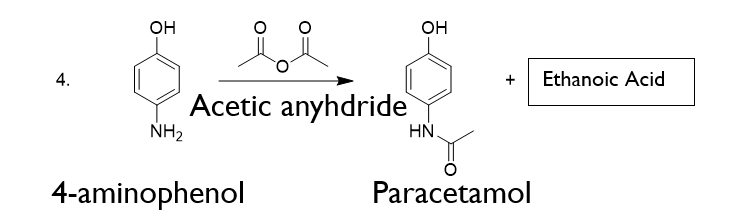

The main impurity identified in literature is 4-acetoxyacetanilide, so this is the goal of the workflow.





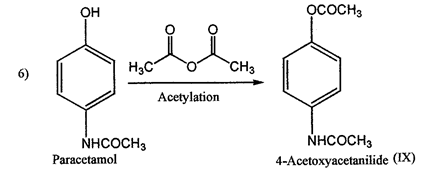

The first stage of the workflow involves mine Reaxys based on the query reaction shown earlier.




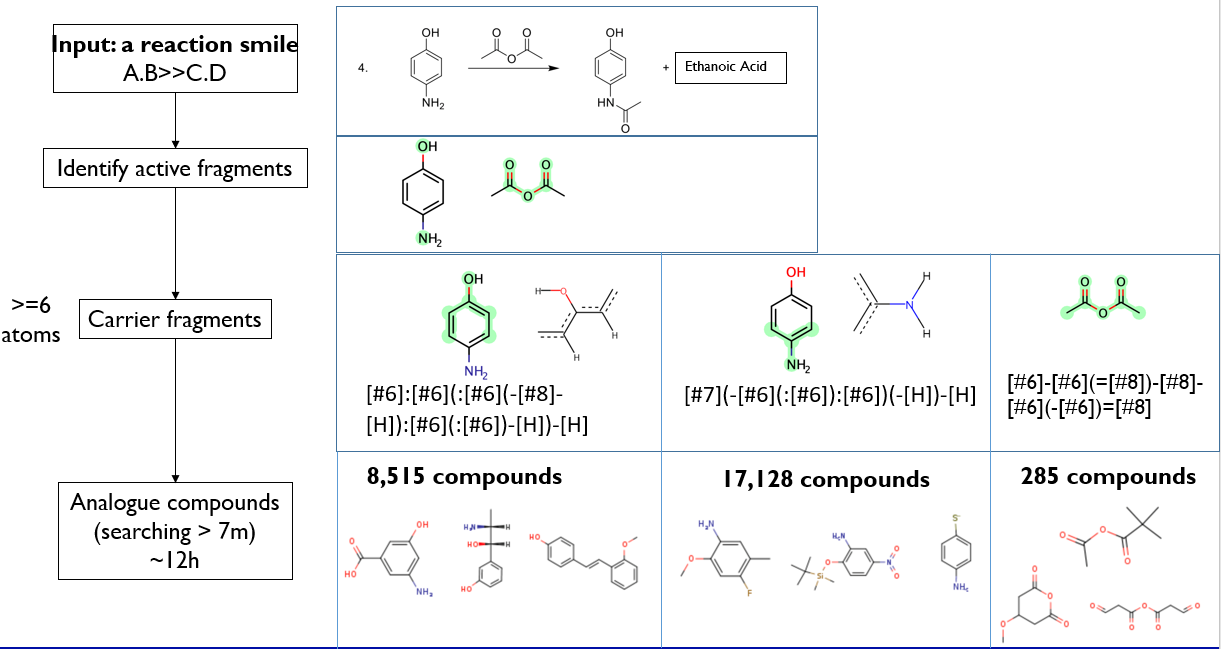



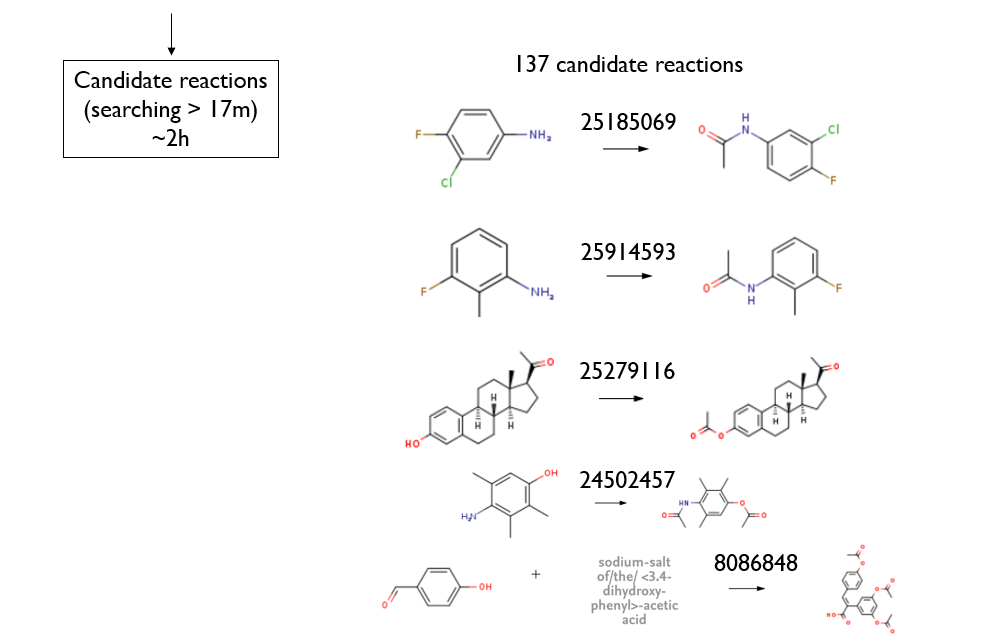

In [57]:
casenum='Case2'
sep=os.sep
inputdir=os.path.join(os.getcwd(),'Input'+sep+casenum)

This demo can be interactive or can be executed in the command line if preferred. The variable `casenum` is arbitrarily defined as the name of the data set. Change the variable `casenum` to your chosen name. The list of candidate reactions should be saved under `{{inputdir}}`. Now, we can move on to the second part of the workflow, data processing and impurity prediction. **Below cells are frozen as case has already been run**

In [22]:
processdata(casenum)

Calling `processdata(casenum)` populates the input directory with a reaction dictionary, rxnlib, and a substance dictionary, smles. The latter includes smiles strings, mol files and other information for all reactants and reagents involved in the candidate reactions. Note that using the command line in the server makes the code run faster (likely due to less overhead) in 5 seconds. First time however takes >2.5 minutes due to lack of caching. 

Next, we attempt to balance reactions, calling `screening`, removing irrelevant reactions (requiring non-analogue compounds,unspecified/unknown chemicals to balance reaction) to give a dictionary of analogue reactions, analogue_rxns. Then, further reactions are screened out where the reaction center is somewhere other than functional groups in matched carrier fragment. Template_dict is the final output which contains balanced, relevant reactions for template generation. Error_dict is the error dictionary containing all reactions screened out and reasons why they were screened out. Running this on command line takes around 46 seconds.

In [106]:
rxnlib,smles,analogue_rxns,template_dict,error_dict=screening(casenum)

Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.


component not in dictionary. Skipping..
component not in dictionary. Skipping..
component not in dictionary. Skipping..
component not in dictionary. Skipping..


Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not reco

Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not reco

Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not reco

Reaction 25185069 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 25185069. Proceeding...
Reaction 25185069 successfully balanced
Reaction 24578034 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 24578034. Proceeding...
Reaction 24578034 could not be balanced. Help compounds did not help.  Reaction 24578034 will be screened out
Charge is not balanced. Reaction 8218347 will be screened out
Reaction 8168270 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 8168270. Proceeding...
Reaction 8168270 could not be balanced. Help compounds did not help.  Reaction 8168270 will be screened out
Reaction 25914593 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 25914593. Proceeding...
Reaction 25914593 successfully balanced
Reaction 25049494 needs to be balanced. Initializing...
Help compounds may need to be added to bal

Reaction 8248315 could not be balanced. Help compounds did not help.  Reaction 8248315 will be screened out
New atom types introduced in products. Other non-analogue species required. Reaction 13901802 will be screened out
Reaction 8195057 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 8195057. Proceeding...
Reaction 8195057 could not be balanced. Help compounds did not help.  Reaction 8195057 will be screened out
New atom types introduced in products. Other non-analogue species required. Reaction 8073974 will be screened out
Reaction 538517 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 538517. Proceeding...
No help atom type match. Reactant complex likely to have other atom types. Reaction 538517 will be screened out
Reaction 25135895 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 25135895. Proceeding...
Reaction 25135895 successfully balanced
R

Reaction 8102726 could not be balanced. Help compounds did not help.  Reaction 8102726 will be screened out
Reaction 24657840 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 24657840. Proceeding...
Reaction 24657840 could not be balanced. Help compounds did not help.  Reaction 24657840 will be screened out
Reaction 406274 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 406274. Proceeding...
Reaction 406274 successfully balanced
Reaction 24896854 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 24896854. Proceeding...
Reaction 24896854 successfully balanced
Reaction 472306 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 472306. Proceeding...
No help atom type match. Reactant complex likely to have other atom types. Reaction 472306 will be screened out
Reaction 30099341 needs to be balanced. Initializing...


Reaction 730522 successfully balanced
Reaction 399052 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 399052. Proceeding...
Reaction 399052 successfully balanced
Reaction 5573144 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 5573144. Proceeding...
Reaction 5573144 could not be balanced. Help compounds did not help.  Reaction 5573144 will be screened out
Reaction 6731042 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 6731042. Proceeding...


Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_spec

Reaction 6731042 successfully balanced
Product 13226812 not in substance dictionary. Reaction 25334061 will be screened out


Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.


Reaction center still outside carrier fragment.
Reaction center still outside carrier fragment.
Reaction center still outside carrier fragment.
LHS species 385737 does not have any carrier fragment and is not analogue. Reaction 270112 will be screened out.
Reaction center still outside carrier fragment.
Reaction center still outside carrier fragment.
LHS species 385737 does not have any carrier fragment and is not analogue. Reaction 8085931 will be screened out.
LHS species 3916485 does not react at functional groups within carrier fragments. Reaction 588211 will be screened out.
Reaction center still outside carrier fragment.
LHS species 385737 does not have any carrier fragment and is not analogue. Reaction 394661 will be screened out.
Reaction center still outside carrier fragment.
Reaction center still outside carrier fragment.
LHS species 5103474 does not have any carrier fragment and is not analogue. Reaction 24365503 will be screened out.
LHS species 3916485 does not react at fu

In [58]:
rxnsscreenedout=len(rxnlib)-len(template_dict)

{{rxnsscreenedout}} reactions are screened out. The remaining {{len(template_dict)}} reactions are processed for template extraction and application, as shown below.

In [107]:
rxnlib,smles,analogue_rxns,template_dict,error_dict=predict_impurities(casenum,screeningdone=True)

25185069
25914593
25914218
25765188
24501929
25209880
25531537
24968865
24879832
37222751
24500679
24430044
24502457
456053
23321570
25842454
24967453
584765
25135895
25116536
25402115
24057737
25279116
28907672
467866
25337999
25848711
24129495
25902539
763043
25123544
25051022
25337635
318988
406274
24896854
30099341
25519775
25343128
25281447
24126593
79722
24142771
25520156
24887305
24519345
24595174
25346498
24287227
24509971
25341002
27796328
24717108
25465927
25136020
25185069
25914593
25914218
25765188
24501929
25209880
25531537
24968865
24879832
37222751
24500679
24430044
24502457
456053
23321570
25842454
24967453
584765
25135895
25116536
25402115
24057737
25279116
28907672
467866
25337999
25848711
24129495
25902539
763043
25123544
25051022
25337635
318988
406274
24896854
30099341
25519775
25343128
25281447
24126593
79722
24142771
25520156
24887305
24519345
24595174
25346498
24287227
24509971
25341002
27796328
24717108
25465927
25136020


The workflow is designed to be modular, with pickle files written to a folder at each stage. After screening, rxnlib, smles, analogue_rxns, and template_dict can be found in `{{os.path.join(os.getcwd(),'Output_Screening'+sep+casenum)}}`.  For purposes of simplicity, the entire workflow can be triggered in one line by calling just `predict_impurities` as follows(commented). Rxnlib, smles, analogue_rxns and template_dict with updated impurities can be found in `{{os.path.join(os.getcwd(),'Output_Final'+sep+casenum)}}`.

In [116]:
rxnlib,smles,analogue_rxns,template_dict,error_dict=predict_impurities(casenum,datapreprocessingdone=False,
                                                                  screeningdone=False,predictiondone=False);

Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.


component not in dictionary. Skipping..
component not in dictionary. Skipping..
component not in dictionary. Skipping..
component not in dictionary. Skipping..


Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not reco

Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not reco

Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not reco

Reaction 25185069 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 25185069. Proceeding...
Reaction 25185069 successfully balanced
Reaction 24578034 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 24578034. Proceeding...
Reaction 24578034 could not be balanced. Help compounds did not help.  Reaction 24578034 will be screened out
Charge is not balanced. Reaction 8218347 will be screened out
Reaction 8168270 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 8168270. Proceeding...
Reaction 8168270 could not be balanced. Help compounds did not help.  Reaction 8168270 will be screened out
Reaction 25914593 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 25914593. Proceeding...
Reaction 25914593 successfully balanced
Reaction 25049494 needs to be balanced. Initializing...
Help compounds may need to be added to bal

Reaction 8248315 could not be balanced. Help compounds did not help.  Reaction 8248315 will be screened out
New atom types introduced in products. Other non-analogue species required. Reaction 13901802 will be screened out
Reaction 8195057 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 8195057. Proceeding...
Reaction 8195057 could not be balanced. Help compounds did not help.  Reaction 8195057 will be screened out
New atom types introduced in products. Other non-analogue species required. Reaction 8073974 will be screened out
Reaction 538517 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 538517. Proceeding...
No help atom type match. Reactant complex likely to have other atom types. Reaction 538517 will be screened out
Reaction 25135895 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 25135895. Proceeding...
Reaction 25135895 successfully balanced
R

Reaction 8102726 could not be balanced. Help compounds did not help.  Reaction 8102726 will be screened out
Reaction 24657840 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 24657840. Proceeding...
Reaction 24657840 could not be balanced. Help compounds did not help.  Reaction 24657840 will be screened out
Reaction 406274 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 406274. Proceeding...
Reaction 406274 successfully balanced
Reaction 24896854 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 24896854. Proceeding...
Reaction 24896854 successfully balanced
Reaction 472306 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 472306. Proceeding...
No help atom type match. Reactant complex likely to have other atom types. Reaction 472306 will be screened out
Reaction 30099341 needs to be balanced. Initializing...


Reaction 730522 successfully balanced
Reaction 399052 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 399052. Proceeding...
Reaction 399052 successfully balanced
Reaction 5573144 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 5573144. Proceeding...
Reaction 5573144 could not be balanced. Help compounds did not help.  Reaction 5573144 will be screened out
Reaction 6731042 needs to be balanced. Initializing...
Help compounds may need to be added to balance reaction 6731042. Proceeding...


Setting 'max_len_single_sentence' is now deprecated. This value is automatically set up.
Setting 'max_len_sentences_pair' is now deprecated. This value is automatically set up.


Reaction 6731042 successfully balanced
Product 13226812 not in substance dictionary. Reaction 25334061 will be screened out


Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not recognized.
Keyword arguments {'return_special_tokens_masks': True} not reco

Reaction center still outside carrier fragment.
Reaction center still outside carrier fragment.
Reaction center still outside carrier fragment.
LHS species 385737 does not have any carrier fragment and is not analogue. Reaction 270112 will be screened out.
Reaction center still outside carrier fragment.
Reaction center still outside carrier fragment.
LHS species 385737 does not have any carrier fragment and is not analogue. Reaction 8085931 will be screened out.
LHS species 3916485 does not react at functional groups within carrier fragments. Reaction 588211 will be screened out.
Reaction center still outside carrier fragment.
LHS species 385737 does not have any carrier fragment and is not analogue. Reaction 394661 will be screened out.
Reaction center still outside carrier fragment.
Reaction center still outside carrier fragment.
LHS species 5103474 does not have any carrier fragment and is not analogue. Reaction 24365503 will be screened out.
LHS species 3916485 does not react at fu

Otherwise, if the workflow is complete and all that remains is visualization, .pickle files can be directly read from directories specified above. **Above cells are frozen as {{casenum}} has been run.** 

In [59]:
rxnlib,smles,analogue_rxns,template_dict,error_dict=predict_impurities(casenum,datapreprocessingdone=True,
                                                                      screeningdone=True,predictiondone=True)

What impurities were generated?

In [60]:
template_dict.keys()
template_dict['25185069'].keys()
impuritylist=getlist(template_dict,'Impurity Smiles')
impurityreaclist=getlist(template_dict,'Impurity Reaction Smiles')
count_impurity=Counter(map(tuple,impuritylist))
count_impurityreac=Counter(map(tuple,impurityreaclist))
impuritylist
count_impurity
impurityreaclist
count_impurityreac

dict_keys(['25185069', '25914593', '25914218', '25765188', '24501929', '25209880', '25531537', '24968865', '24879832', '37222751', '24500679', '24430044', '24502457', '456053', '23321570', '25842454', '24967453', '584765', '25135895', '25116536', '25402115', '24057737', '25279116', '28907672', '467866', '25337999', '25848711', '24129495', '25902539', '763043', '25123544', '25051022', '25337635', '318988', '406274', '24896854', '30099341', '25519775', '25343128', '25281447', '24126593', '79722', '24142771', '25520156', '24887305', '24519345', '24595174', '25346498', '24287227', '24509971', '25341002', '27796328', '24717108', '25465927', '25136020'])

dict_keys(['Reactants', 'Products', 'Reagents', 'Solvent', 'Catalyst', 'Temperature', 'Pressure', 'pH', 'Residence Time', 'Yield', 'Steps', 'Num Ref', 'Year', 'RSmiles', 'RSmiles2', 'Mapping', 'Confidence', 'RDKit Rxn', 'Sketch', 'Mapping Dictionary', 'Reaction Center', 'Mapping2', 'Confidence2', 'RDKit Rxn2', 'Sketch2', 'Mapping Dictionary2', 'Reaction Center2', 'Help Products', 'Balanced RSmiles', 'Balanced Reactants', 'Balanced Products', 'Balanced Mapping', 'Balanced Confidence', 'Balanced RDKit Rxn', 'Balanced Sketch', 'Balanced Mapping Dictionary', 'Balanced Reaction Center', 'Fragment Location', 'Clean Reaction', 'Query Reactants', 'Template', 'Template Reaction', 'Template Sketch', 'Impurity Smiles', 'Impurity Molecules', 'Impurity Reaction Smiles', 'Impurity RDKit Reaction', 'Impurity Reaction Sketch'])

[[('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(OC(C)=O)cc1', 'O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)O', 'CC(=O)Oc1ccc(N)cc1')],
 [('CC(=O)O', 'CC(=O)Oc1ccc(N)cc1')],
 [('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O')],
 [('CC(=O)O', 'CC(=O)Oc1ccc(N)cc1')],
 [('CC(=O)O', 'CC(=O)Oc1ccc(N)cc1')],
 [('CC(=O)O', 'CC(=O)Oc1ccc(N)cc1')],
 [('CC(=O)Nc

Counter({(('CC(=O)Nc1ccc(O)cc1', 'CC(=O)O'),): 42,
         (('CC(=O)Nc1ccc(OC(C)=O)cc1', 'O'),): 1,
         (('CC(=O)O', 'CC(=O)Oc1ccc(N)cc1'),): 9})

[['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O'],
 ['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O'],
 ['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O'],
 ['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O'],
 ['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O'],
 ['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O'],
 ['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O'],
 ['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O'],
 ['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O'],
 ['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O'],
 ['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O'],
 ['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O'],
 ['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(OC(C)=O)cc1.O'],
 ['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O'],
 ['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O'],
 ['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O'],
 ['CC(=O)OC(C)=O.Nc1ccc(

Counter({('CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O',): 42,
         ('CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(OC(C)=O)cc1.O',): 1,
         ('CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)O.CC(=O)Oc1ccc(N)cc1',): 9})

['CC(=O)OC(C)=O.Nc1ccc(O)cc1>>CC(=O)Nc1ccc(O)cc1.CC(=O)O']

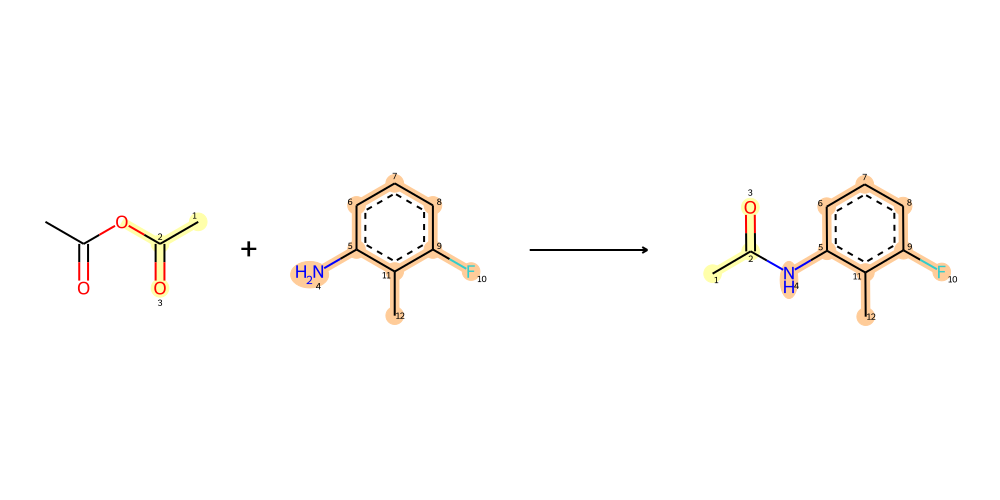

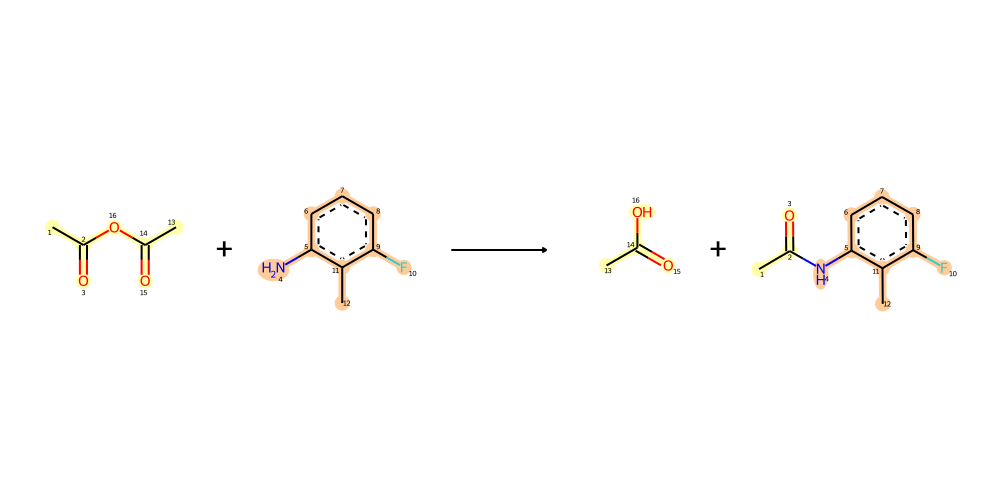

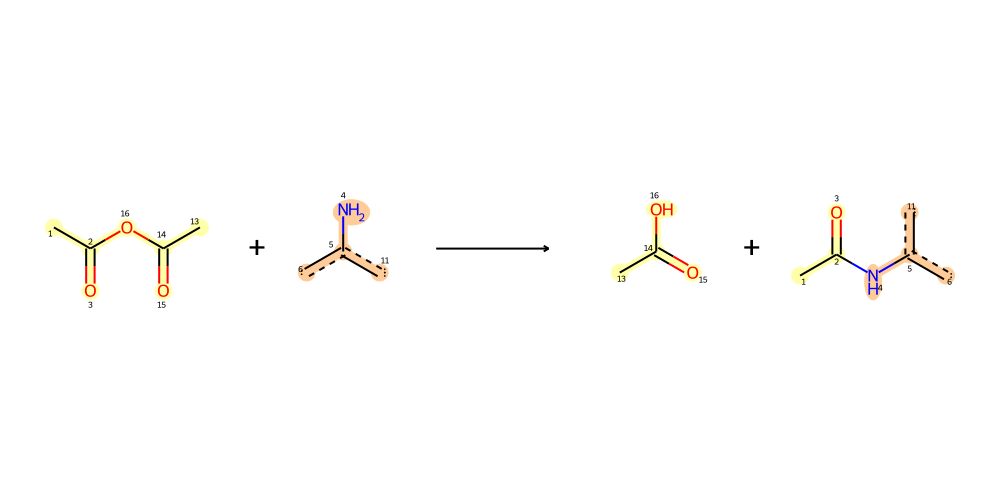

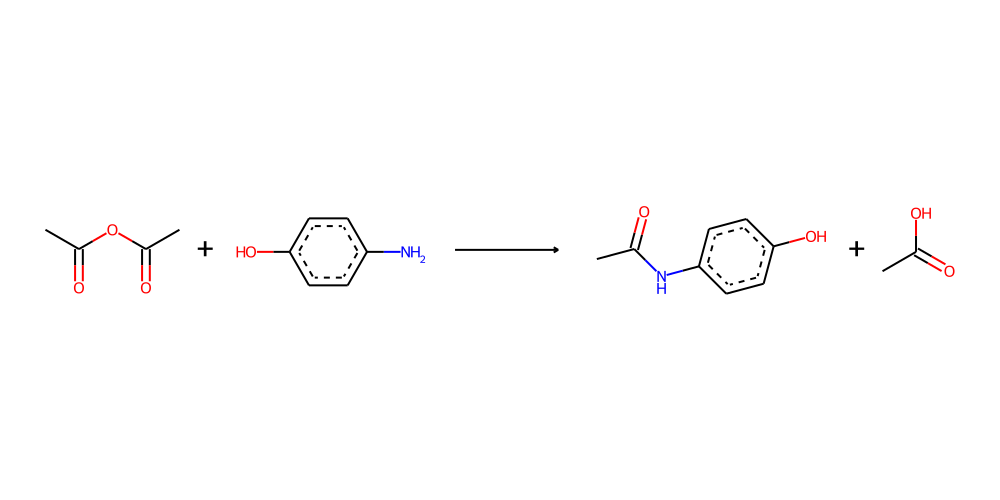

In [61]:
template_dict['25914593']['Impurity Reaction Smiles']
template_dict['25914593']['Sketch2']
template_dict['25914593']['Balanced Sketch']

template_dict['25914593']['Template Sketch']
template_dict['25914593']['Impurity Reaction Sketch'][0]


First, we can analyze error_dict to understand which reactions were screened out and why.

In [62]:
error_count=Counter(getlist(error_dict,'Reason for screen out'))
error_count

Counter({'Reaction could not be balanced with help compounds.': 31,
         'Charge imbalanced.': 3,
         'New atom types in products.': 17,
         'Products not in substance dictionary': 2,
         'LHS species has new atom type not present in any help compound.': 3,
         'Reaction center still outside carrier fragment.': 15,
         'No carrier fragment found within LHS species.': 7,
         'Carrier fragment found but invalid reaction center.': 4,
         'Likely mismatch in number of template and query reactants. Check template.': 1,
         'Template did not work. Likely incompatibility with query reactants.': 2})